In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
path = 'data.csv'
data = pd.read_csv(path)

In [4]:
data1 = data.copy()

In [5]:
data.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [6]:
data.shape

(174389, 19)

In [7]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [8]:
data.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acousticness', ylabel='Density'>

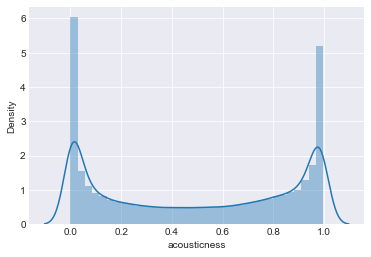

In [10]:
sns.distplot(data['acousticness'])

In [11]:
data.drop(columns = ['artists'], axis = 1, inplace = True)

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='danceability', ylabel='Density'>

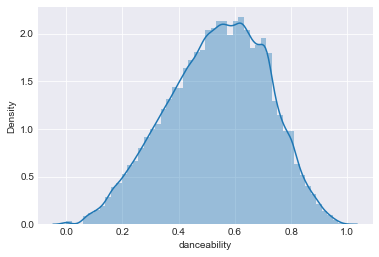

In [12]:
sns.distplot(data['danceability'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

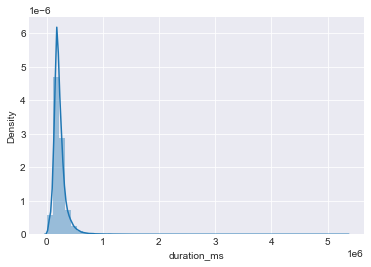

In [13]:
sns.distplot(data['duration_ms'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy', ylabel='Density'>

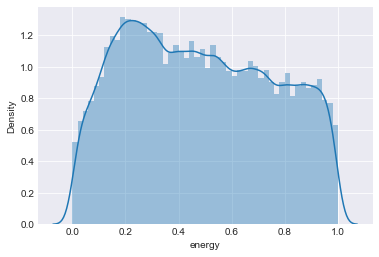

In [14]:
sns.distplot(data['energy'])

<AxesSubplot:>

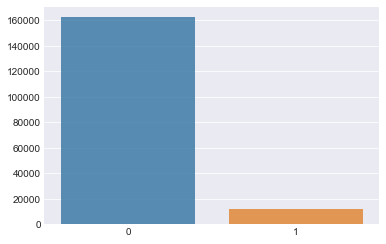

In [15]:
sns.barplot(x=data['explicit'].value_counts().index,y = data['explicit'].value_counts().values,alpha=0.8)

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

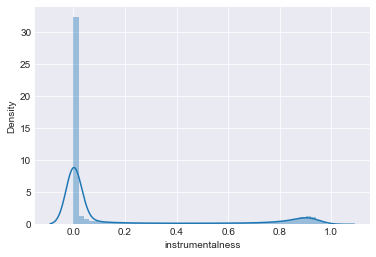

In [16]:
sns.distplot(data['instrumentalness'])

<AxesSubplot:>

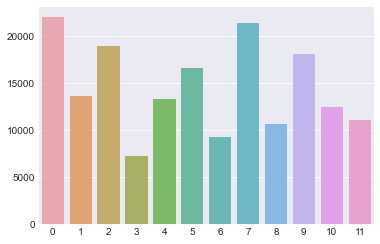

In [17]:
sns.barplot(x=data['key'].value_counts().index,y = data['key'].value_counts().values,alpha=0.8)

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='liveness', ylabel='Density'>

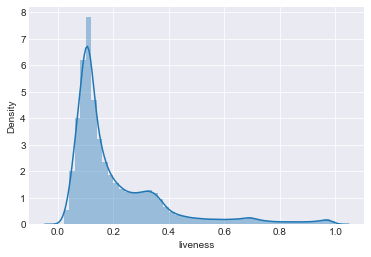

In [18]:
sns.distplot(data['liveness'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loudness', ylabel='Density'>

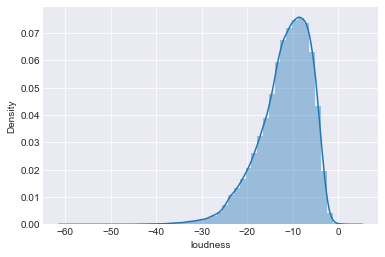

In [19]:
sns.distplot(data['loudness'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='loudness'>

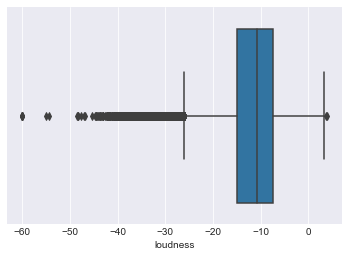

In [20]:
sns.boxplot(data['loudness'])

<AxesSubplot:>

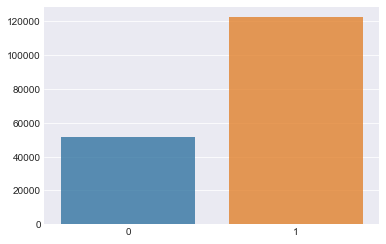

In [21]:
sns.barplot(x=data['mode'].value_counts().index,y = data['mode'].value_counts().values,alpha=0.8)

In [22]:
data.drop(columns = ['name'], axis = 1, inplace = True)

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

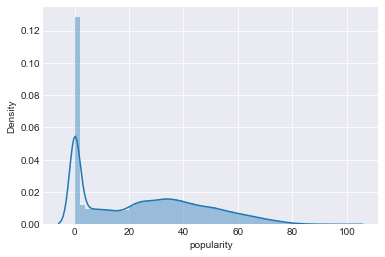

In [23]:
sns.distplot(data['popularity'])

<AxesSubplot:>

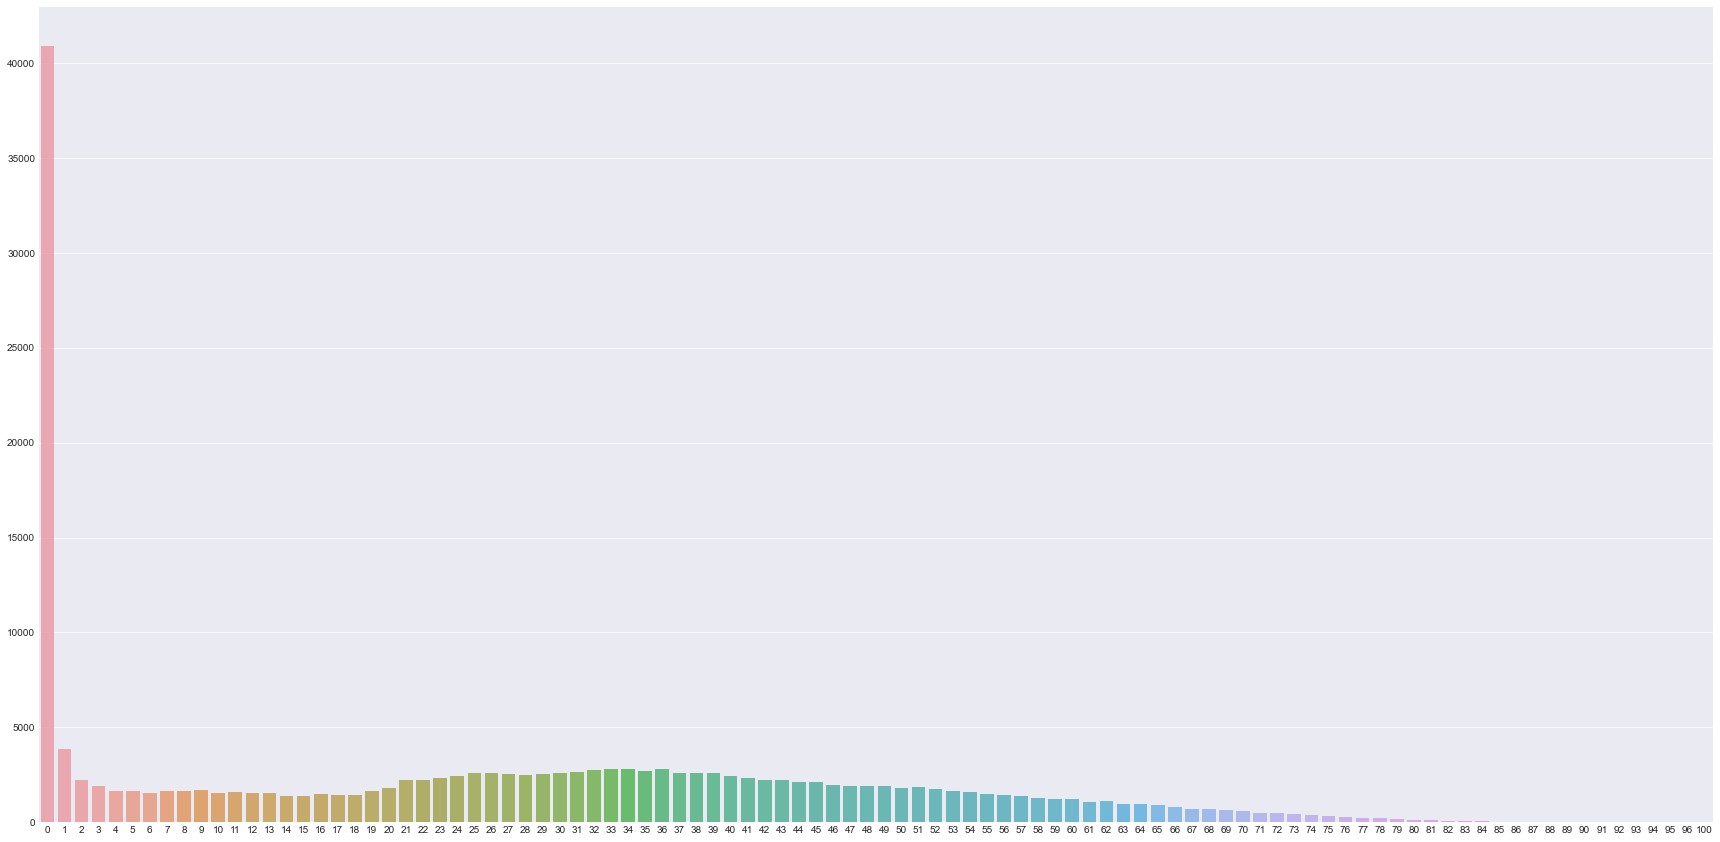

In [24]:
plt.figure(figsize = (30,15))
sns.barplot(x=data['popularity'].value_counts().index,y = data['popularity'].value_counts().values,alpha=0.8)

In [25]:
data.drop(columns = ['release_date'], axis = 1, inplace = True)

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speechiness', ylabel='Density'>

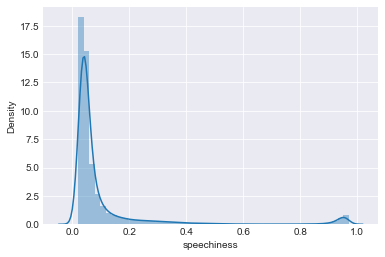

In [26]:
sns.distplot(data['speechiness'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tempo', ylabel='Density'>

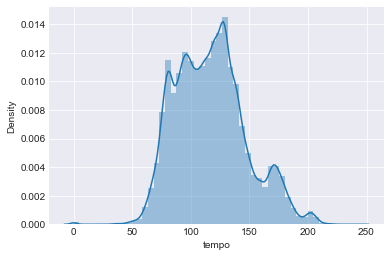

In [27]:
sns.distplot(data['tempo'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valence', ylabel='Density'>

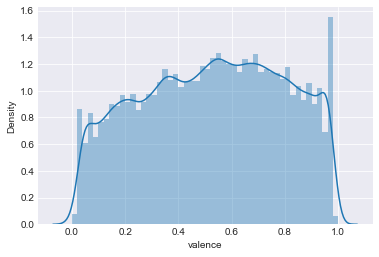

In [28]:
sns.distplot(data['valence'])

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Year')

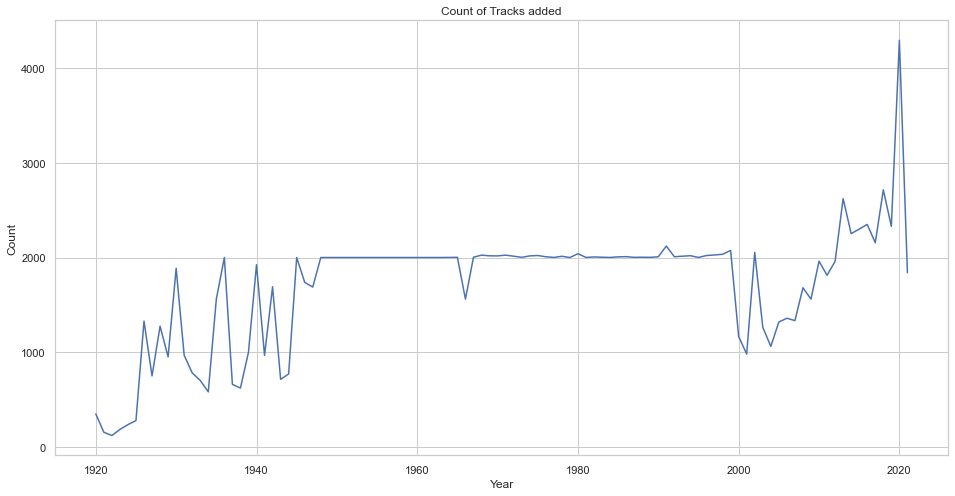

In [37]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = data.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

<AxesSubplot:>

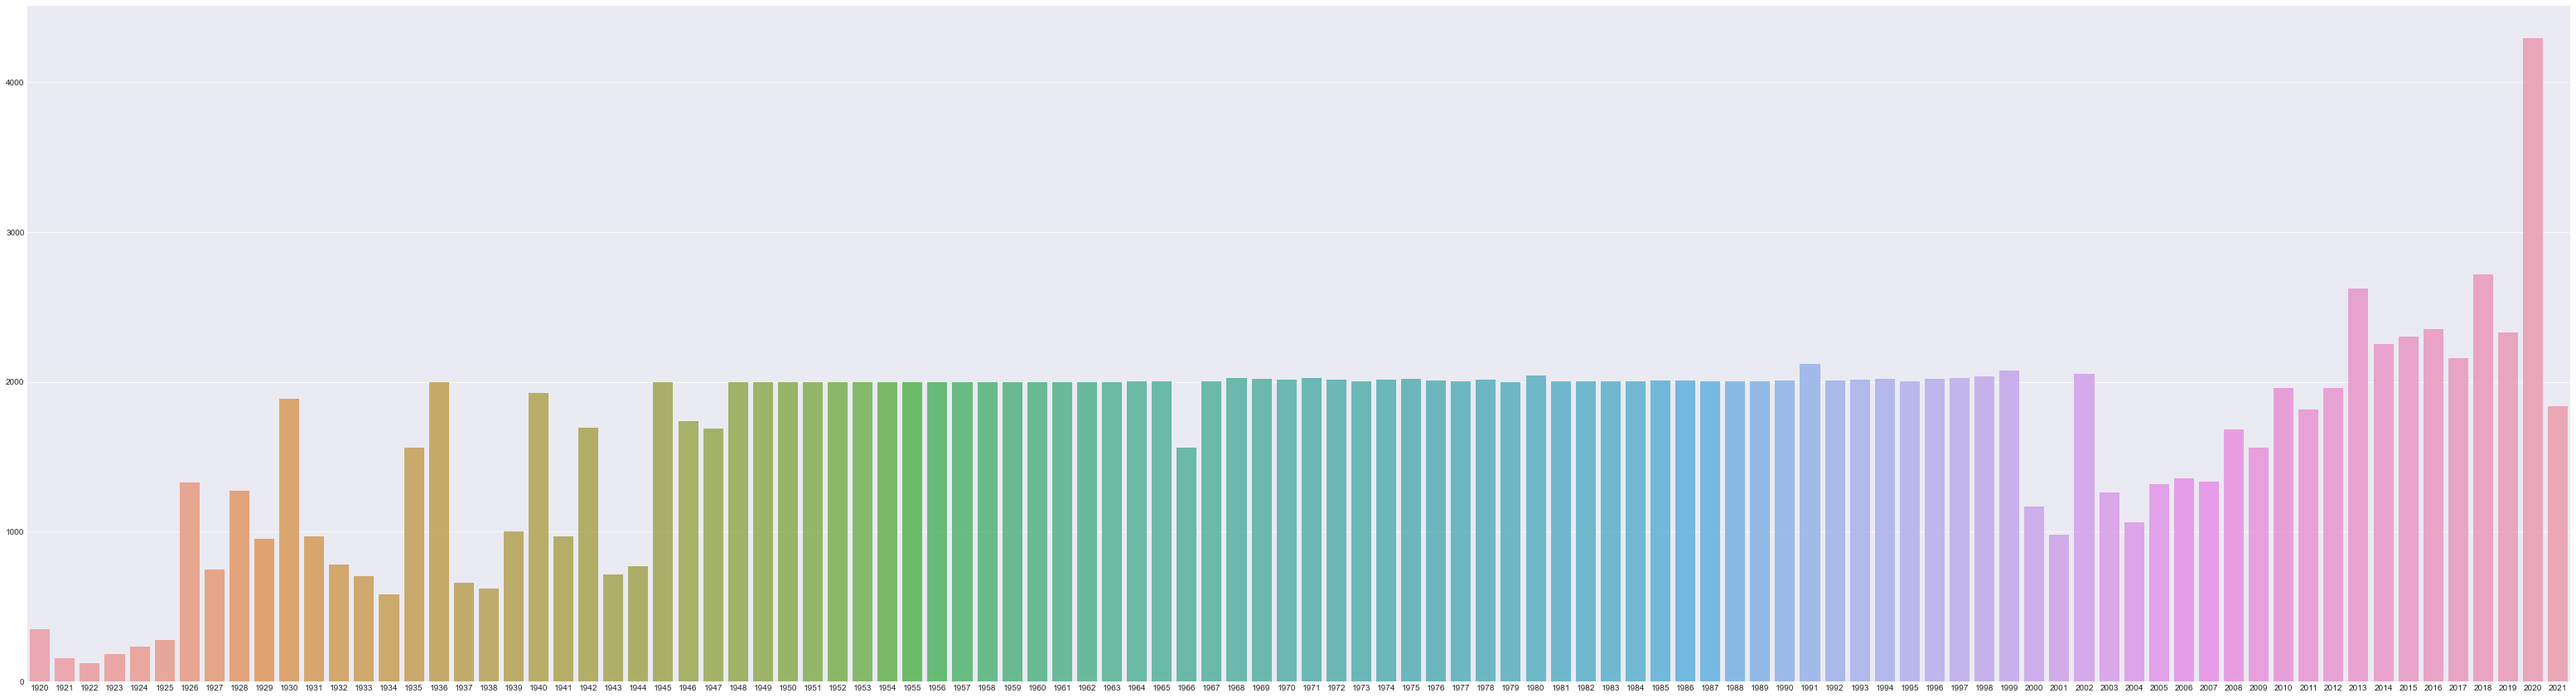

In [29]:
plt.figure(figsize = (55,15))
sns.barplot(x=data['year'].value_counts().index,y = data['year'].value_counts().values,alpha=0.8)

Text(0.5, 0, 'Year')

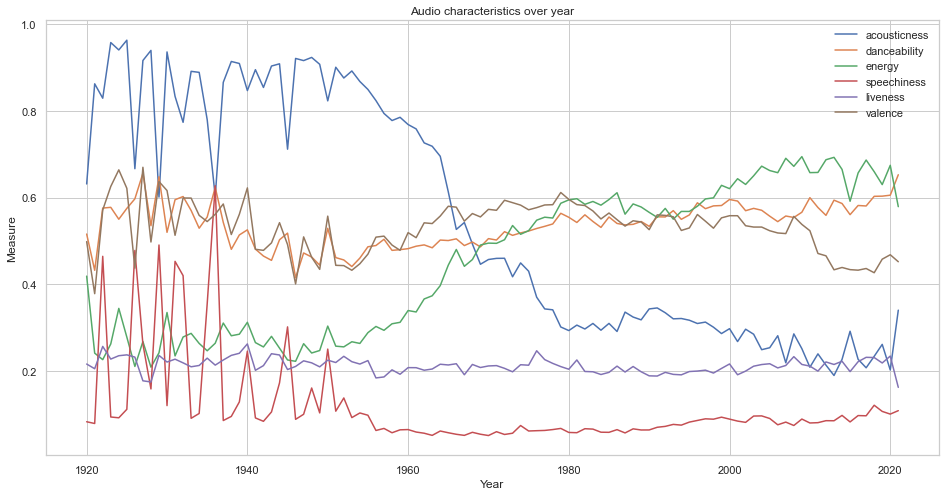

In [41]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

In [43]:
data.drop(columns = ['id'], axis = 1, inplace = True)

# data

In [44]:
data2 = data.copy()

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   danceability      174389 non-null  float64
 2   duration_ms       174389 non-null  int64  
 3   energy            174389 non-null  float64
 4   explicit          174389 non-null  int64  
 5   instrumentalness  174389 non-null  float64
 6   key               174389 non-null  int64  
 7   liveness          174389 non-null  float64
 8   loudness          174389 non-null  float64
 9   mode              174389 non-null  int64  
 10  popularity        174389 non-null  int64  
 11  speechiness       174389 non-null  float64
 12  tempo             174389 non-null  float64
 13  valence           174389 non-null  float64
 14  year              174389 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 20.0 MB


# Normalization

In [46]:
SS = StandardScaler()

In [47]:
SS.fit(data)

StandardScaler()

In [48]:
data = SS.transform(data)

In [49]:
data = pd.DataFrame(data)

In [50]:
data3 = data.copy()

# Clustering

## KMeans

In [51]:
data1_temp = data.sample(5000) 

In [52]:
clusters = 16
inertias = []
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1_temp)
    inertias.append(km.inertia_)

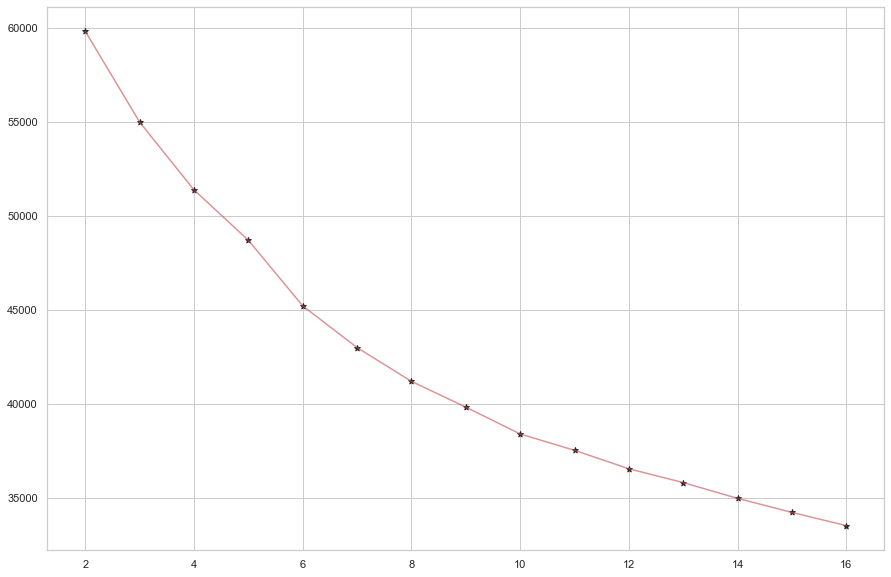

In [53]:
plt.figure(figsize = (15, 10))
plt.scatter(range(2, clusters+1), inertias, marker = '*', c = 'k',alpha = 0.9)
plt.plot(range(2, clusters+1), inertias, c = 'r', alpha = 0.6)

score : 0.1841075599809833
score : 0.19301065030710435
score : 0.14747304559564467
score : 0.12095235163659254
score : 0.13350783894574356
score : 0.13738741202115556
score : 0.13527276059726986
score : 0.1200304133516089
score : 0.12492052892131937
score : 0.1170738955791895
score : 0.12026065256191858
score : 0.11911583899831342
score : 0.11805271422750725
score : 0.12162049465462806
score : 0.11561380947228266


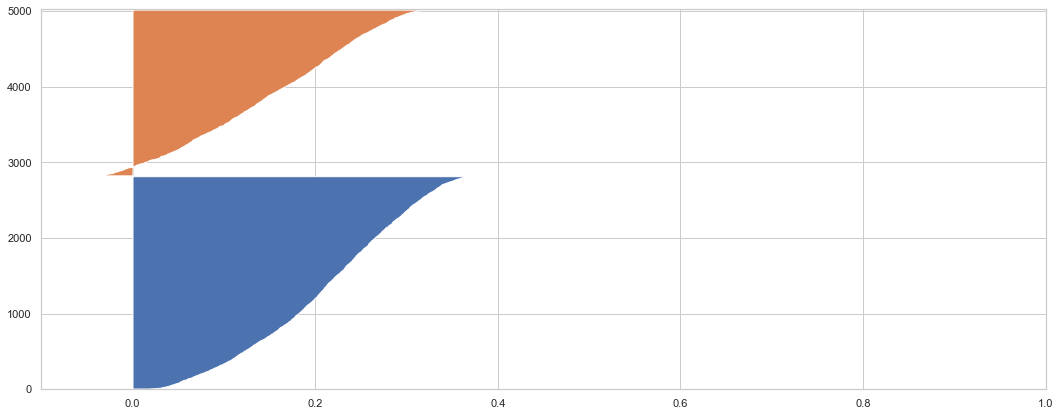

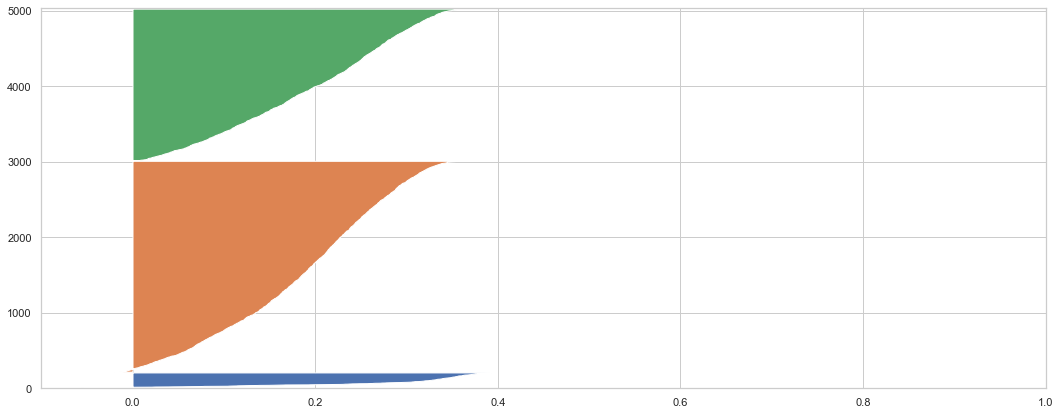

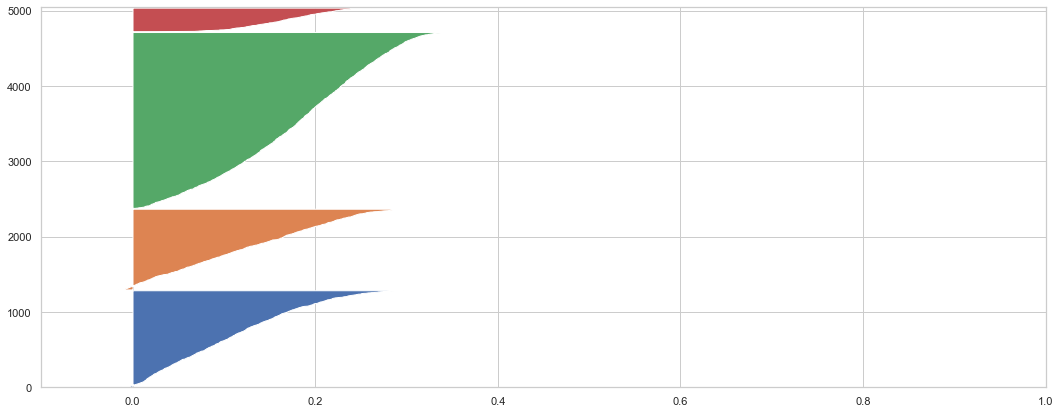

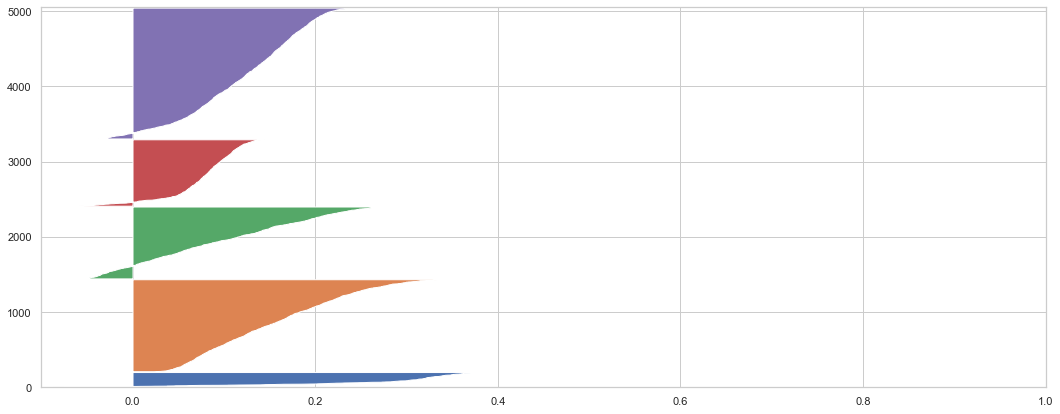

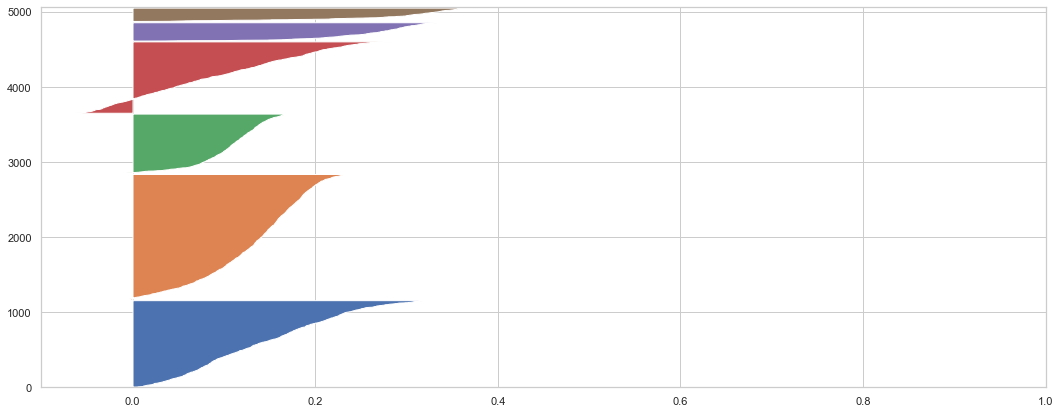

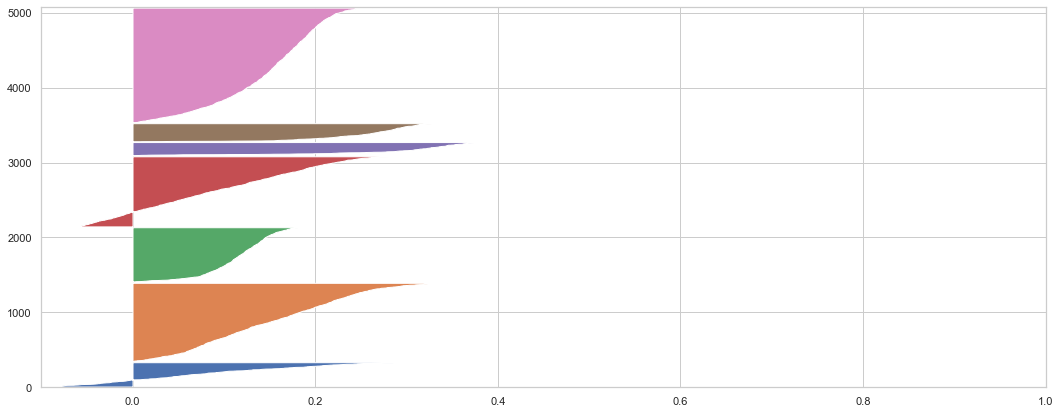

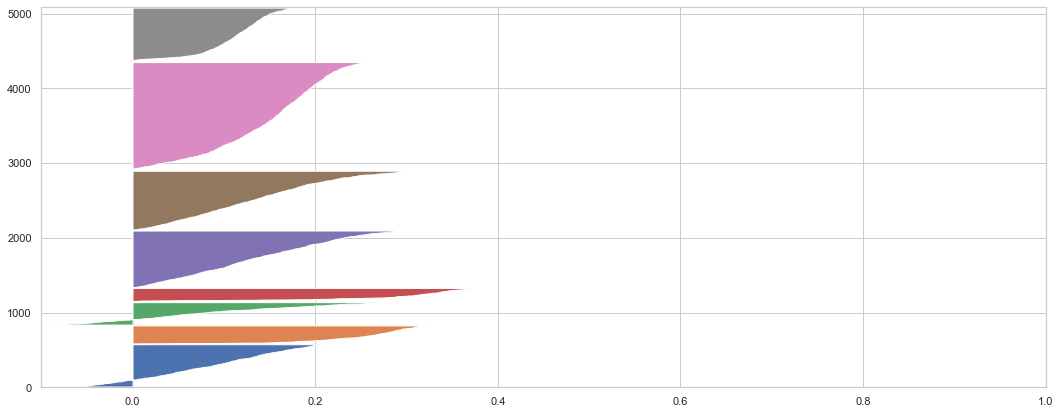

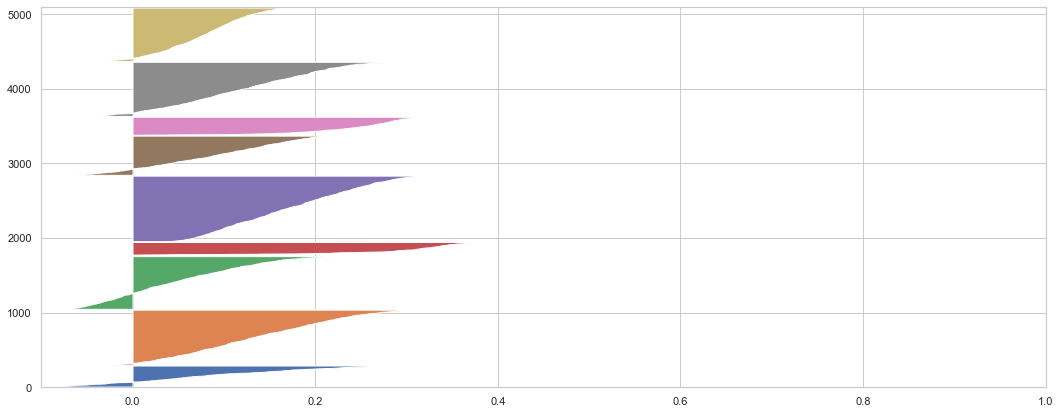

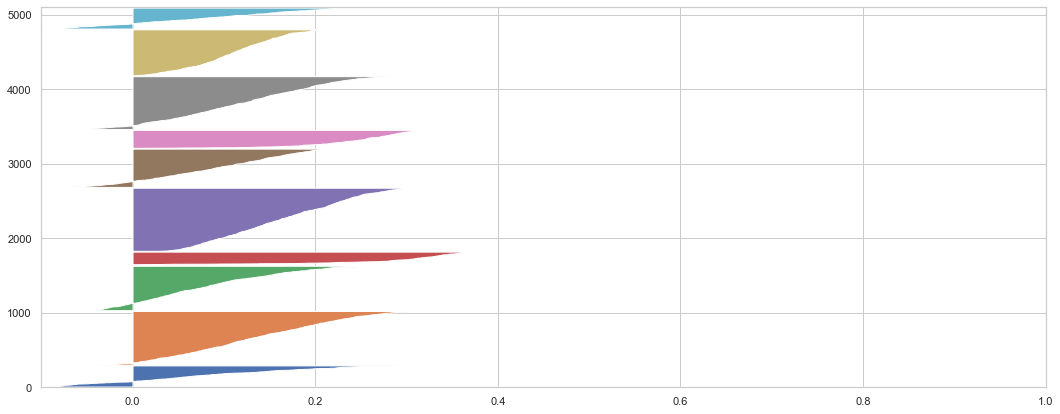

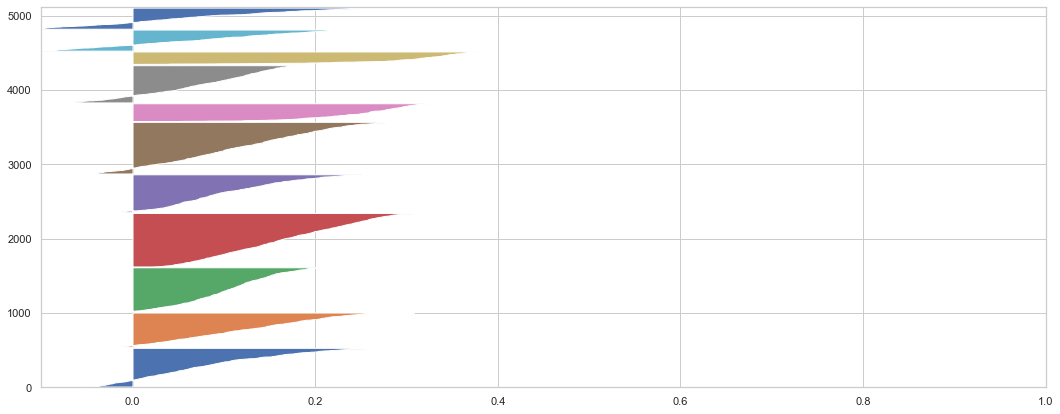

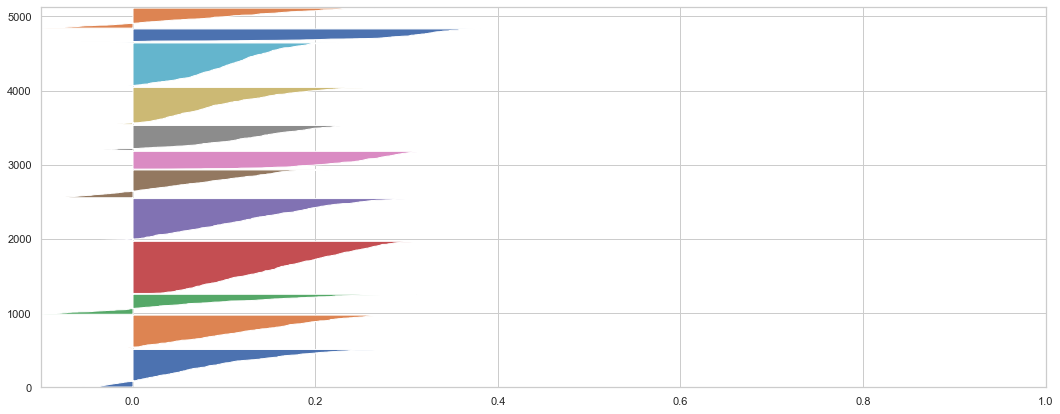

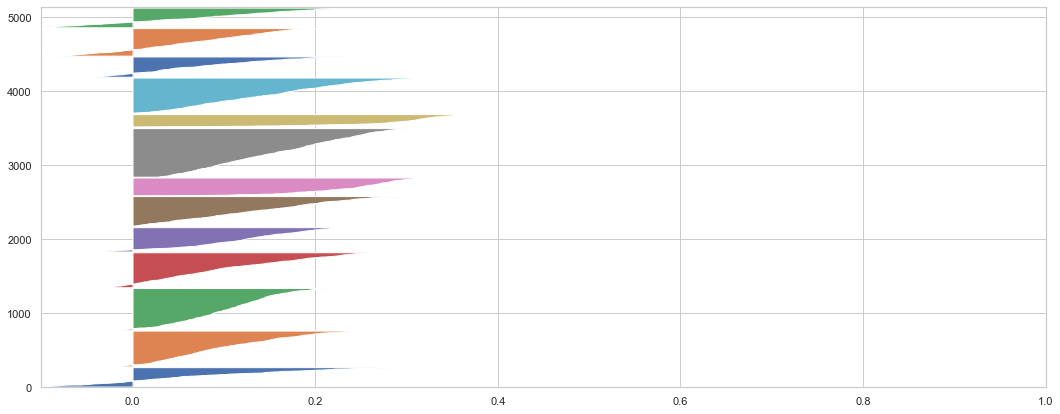

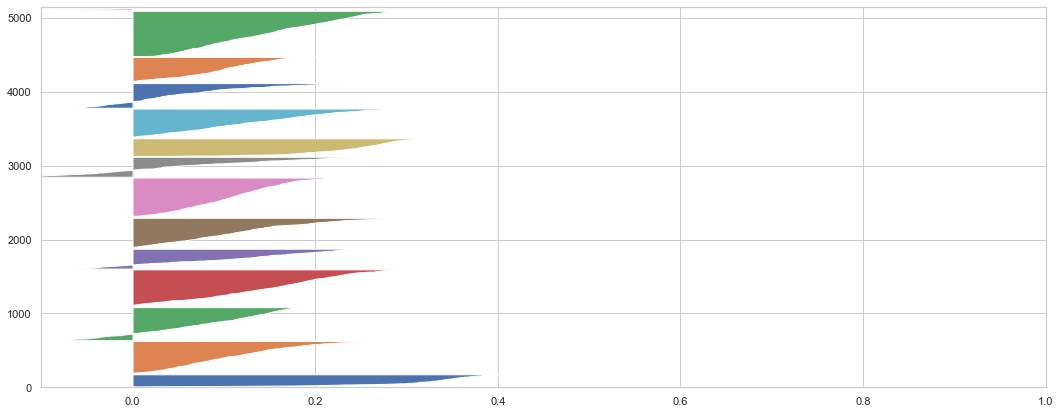

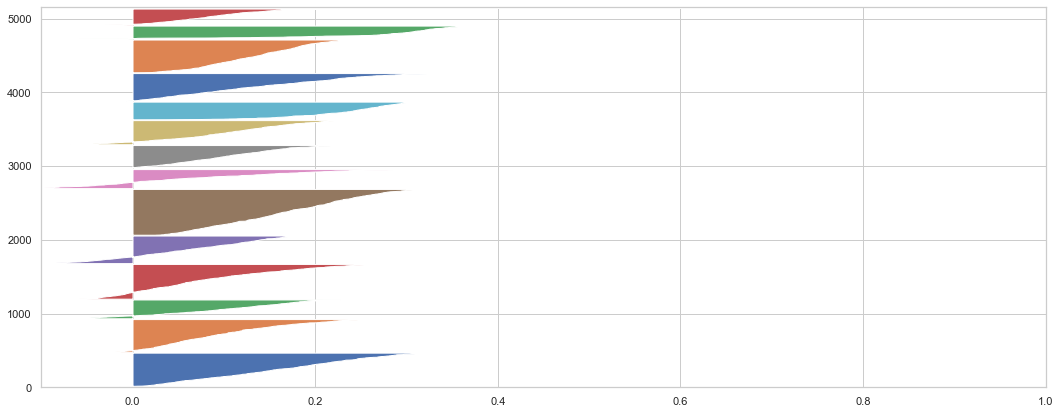

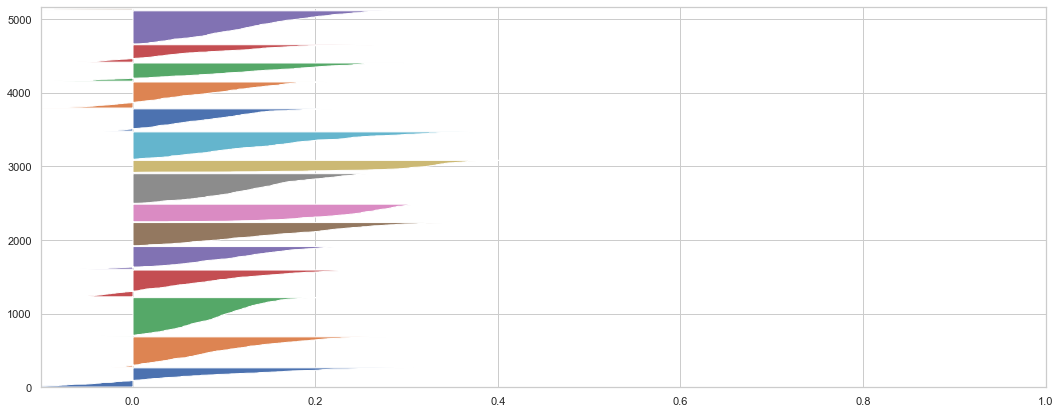

In [54]:
kmeans_silhouette_scores = [] 
clusters = 16
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1_temp)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1_temp) + (cluster + 1) * 10])
    
    score = silhouette_score(data1_temp, y)
    kmeans_silhouette_scores.append(score)
    print('score :',score)

    sil_sample = silhouette_samples(data1_temp, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

## KModes

In [55]:
clusters = 16
costs = []
for cluster in range(2, clusters+1):
    km = KModes(n_clusters = cluster,init='Cao', random_state = 2)
    y = km.fit_predict(data1_temp)
    costs.append(km.cost_)

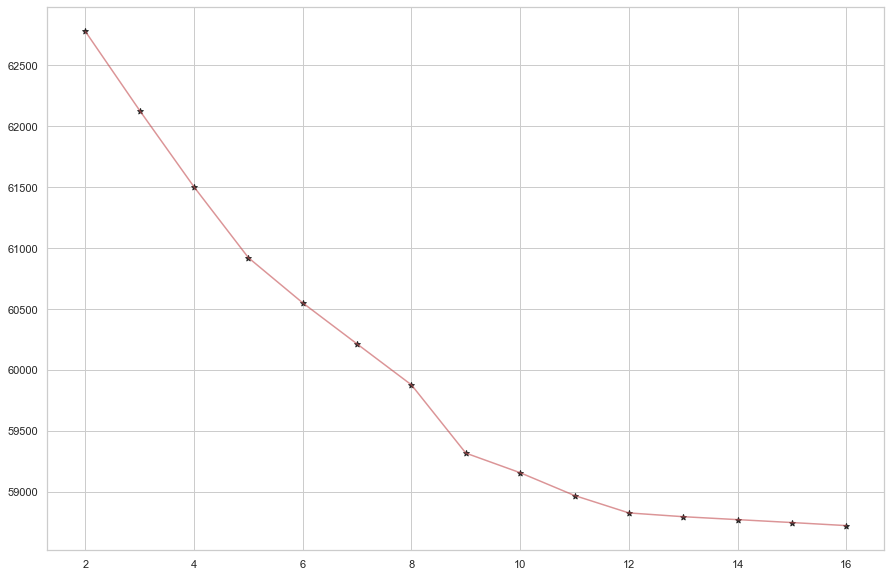

In [56]:
plt.figure(figsize = (15, 10))
plt.scatter(range(2, clusters+1), costs, marker = '*', c = 'k',alpha = 0.9)
plt.plot(range(2, clusters+1), costs, c = 'r', alpha = 0.6)

score : 0.02872708479632255
score : -0.013489120344986004
score : -0.021839513143528295
score : -0.02725910874296957
score : -0.023712921527580703
score : -0.025875248951782514
score : -0.02695248805763731
score : -0.02091121324497362
score : -0.023924120749023437
score : -0.028781870407202058
score : -0.04117519766104156
score : -0.05050519920205038
score : -0.0543886816459026
score : -0.05453808810183467
score : -0.054621552672827534


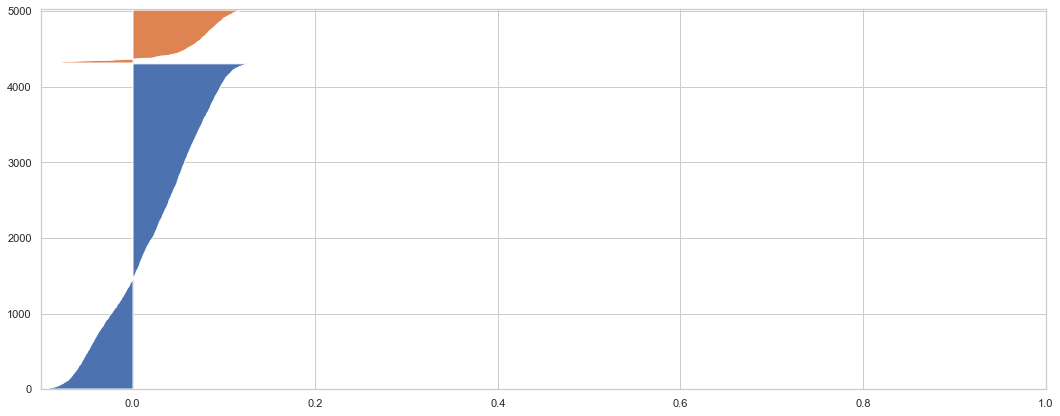

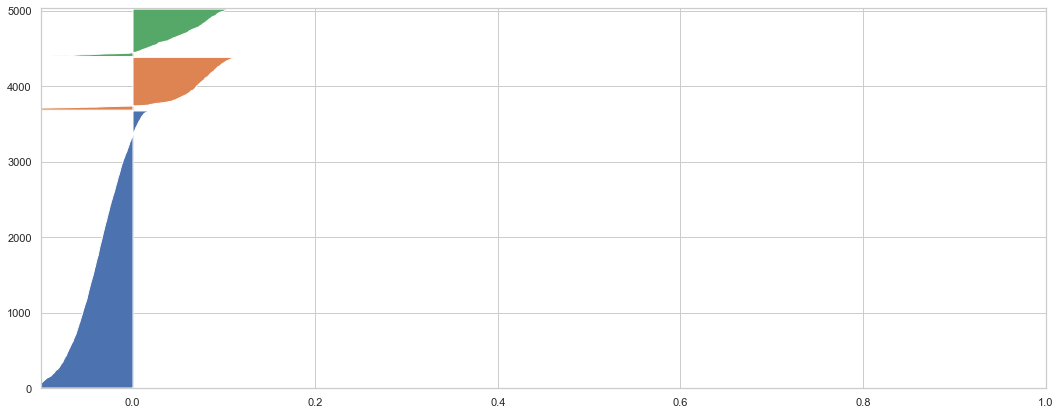

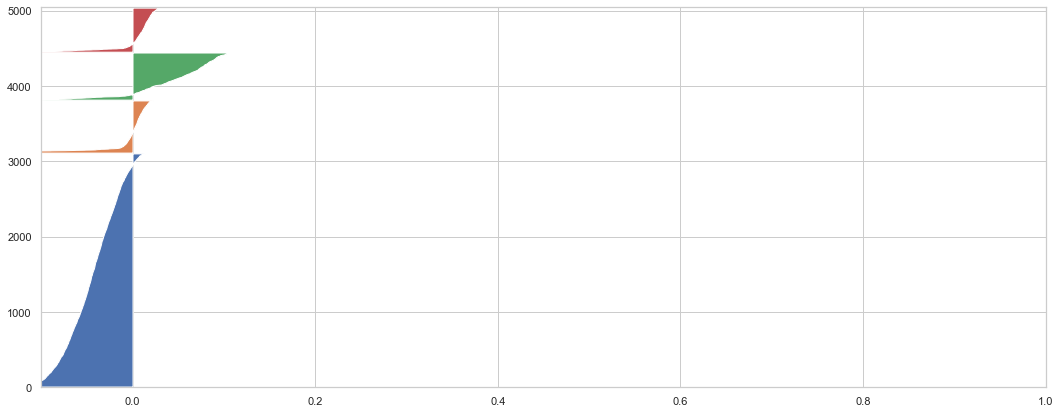

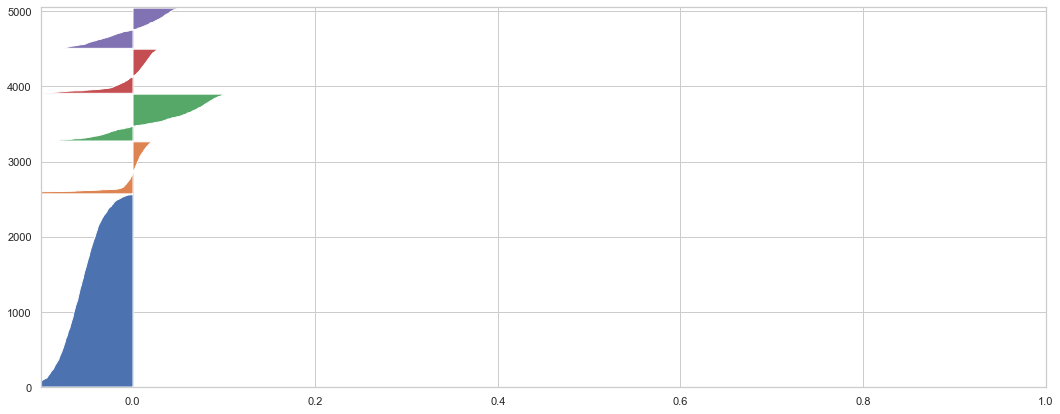

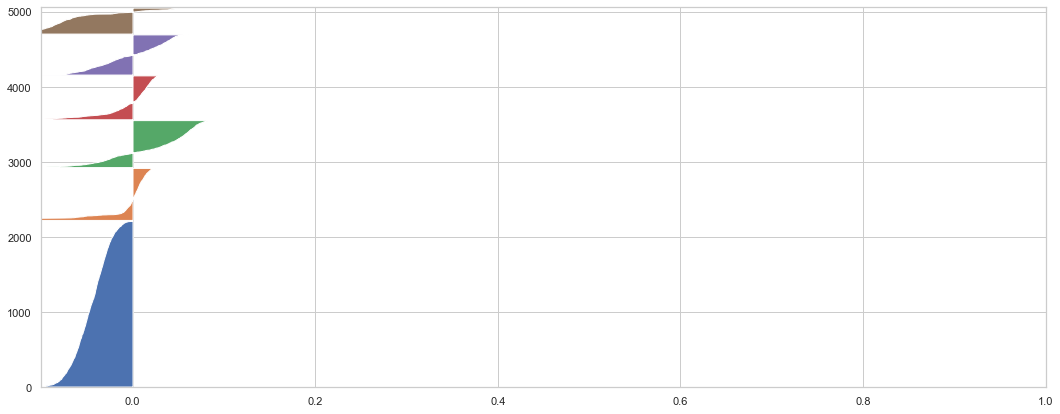

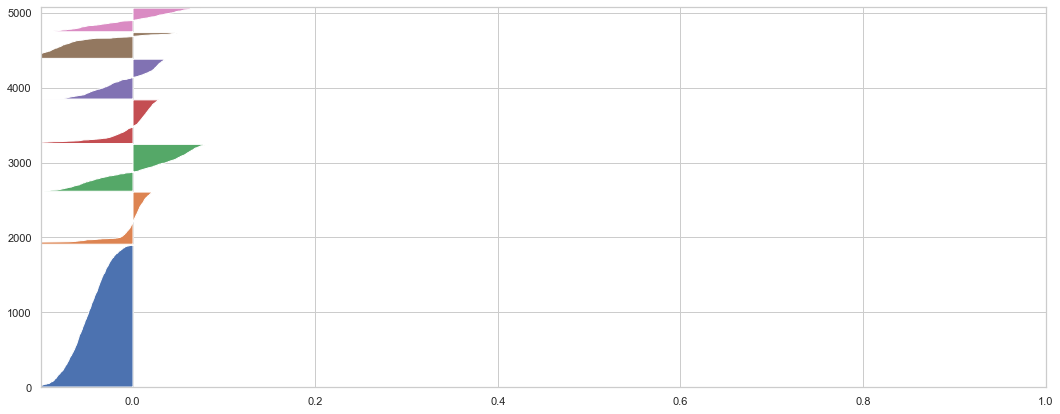

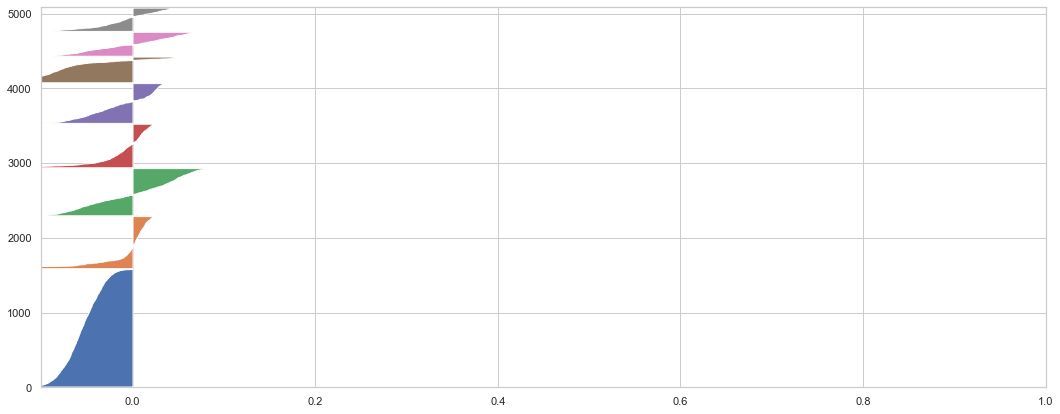

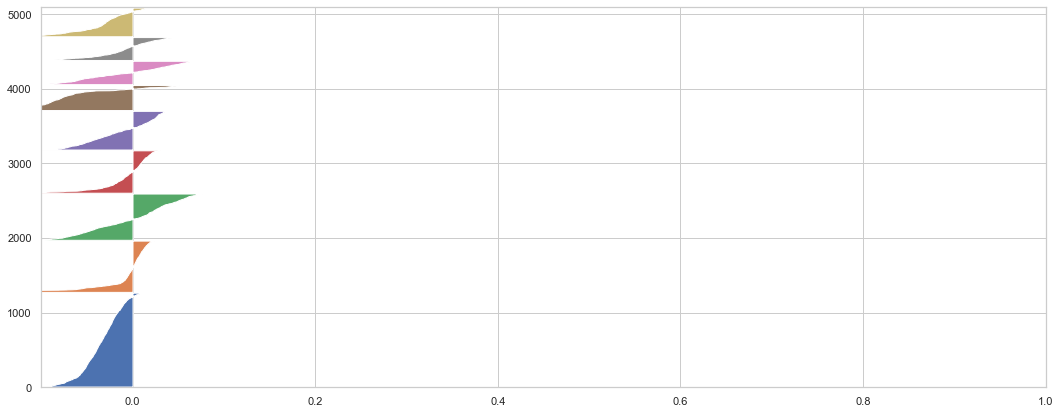

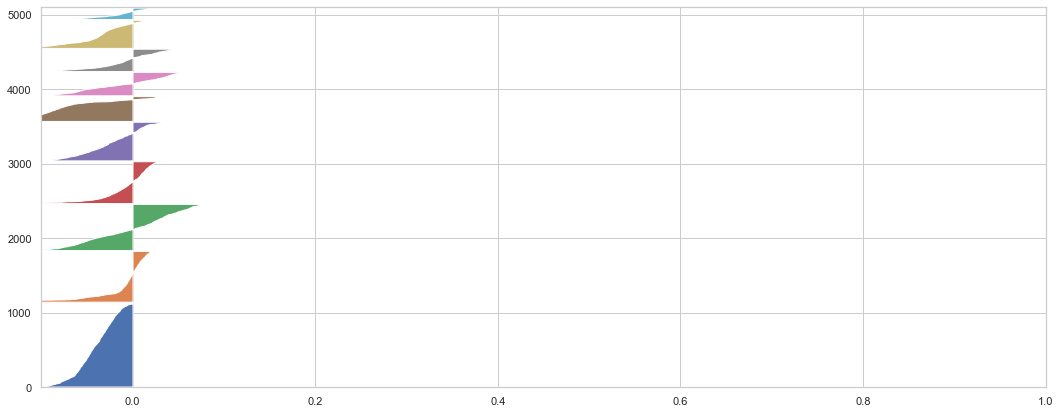

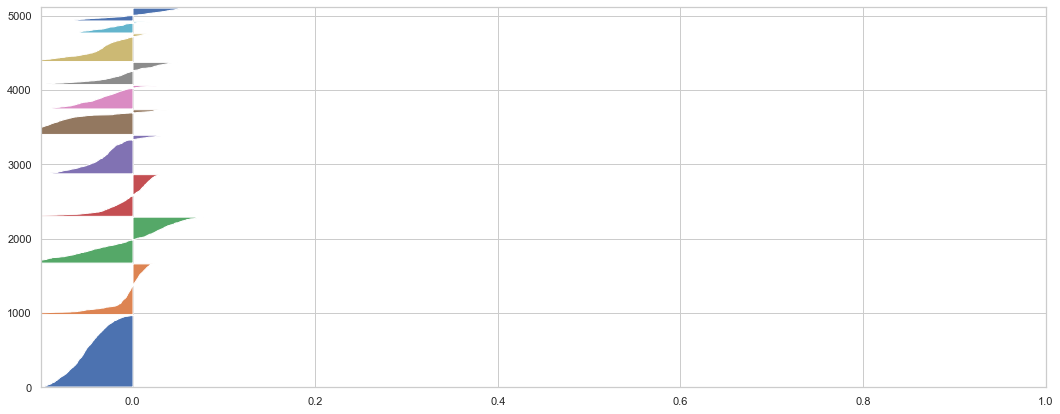

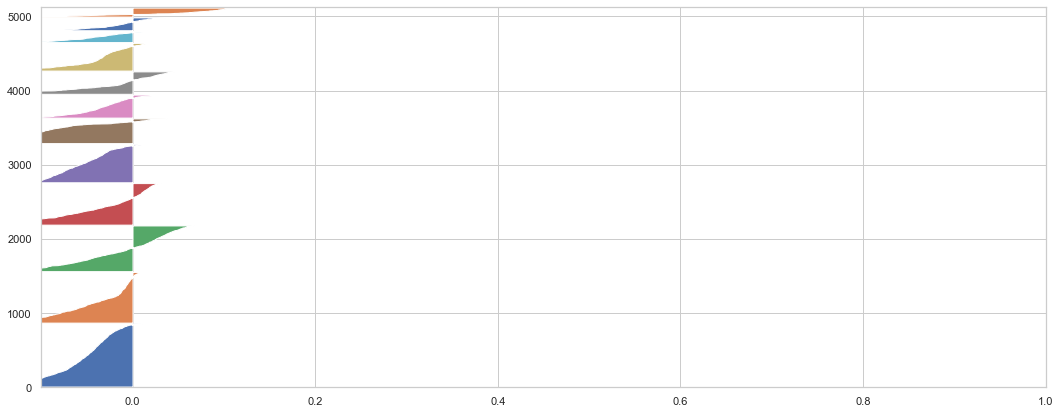

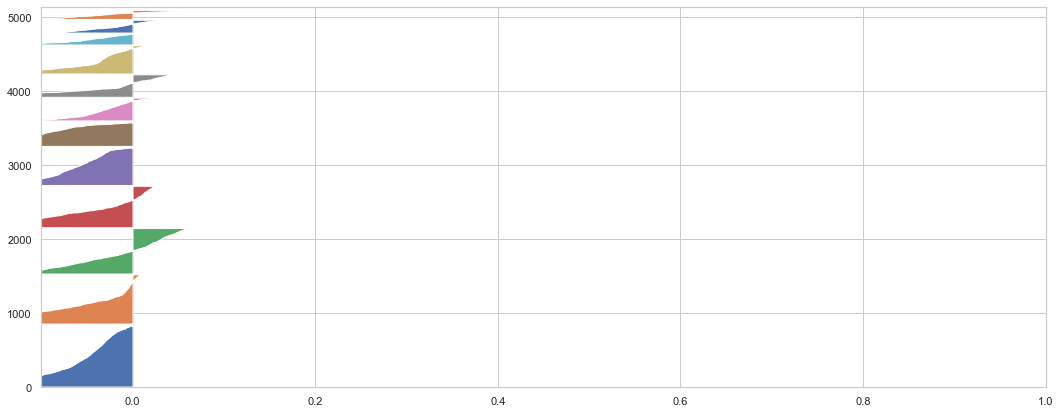

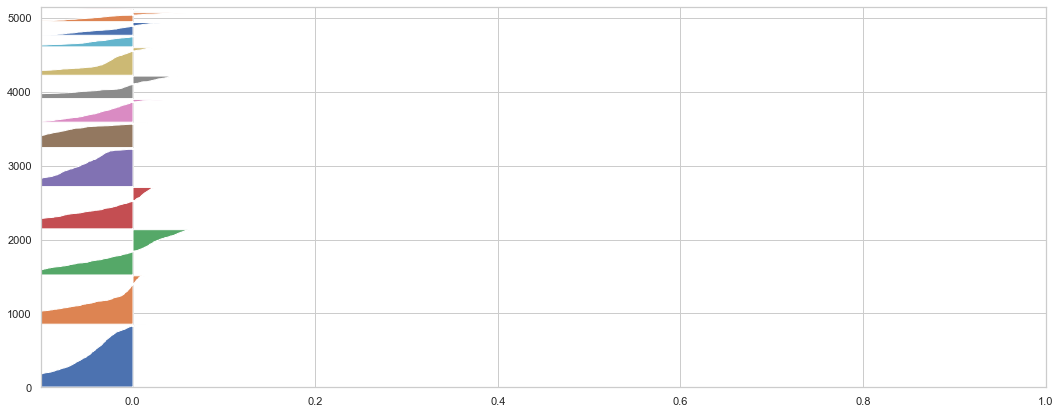

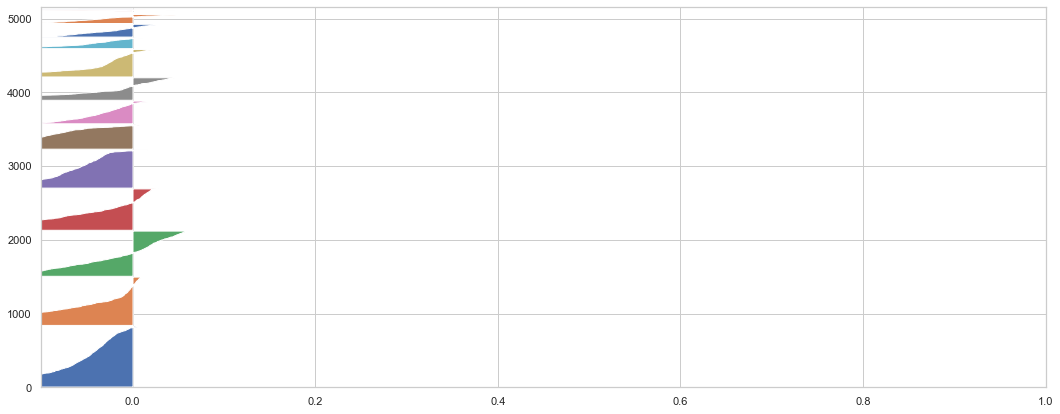

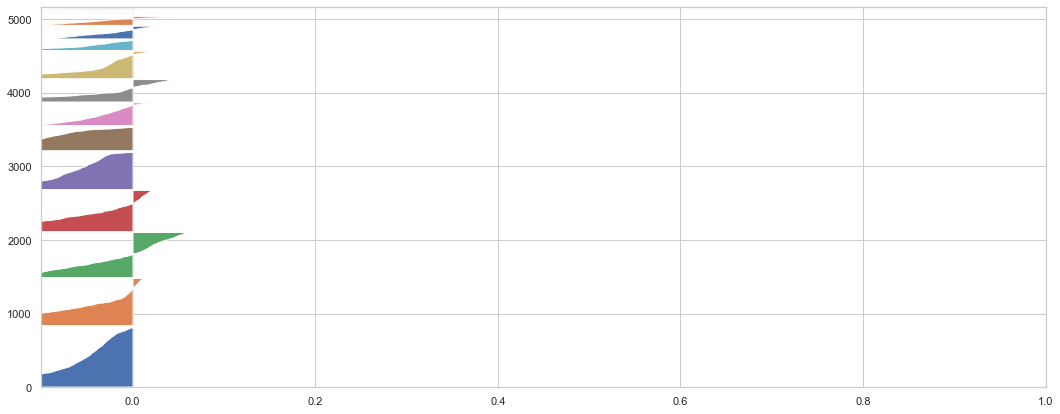

In [57]:
kmodes_silhouette_scores = []
clusters = 16
for cluster in range(2, clusters+1):
    km = KModes(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1_temp)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1_temp) + (cluster + 1) * 10])
    
    score = silhouette_score(data1_temp, y)
    kmodes_silhouette_scores.append(score)
    print('score :',score)

    sil_sample = silhouette_samples(data1_temp, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

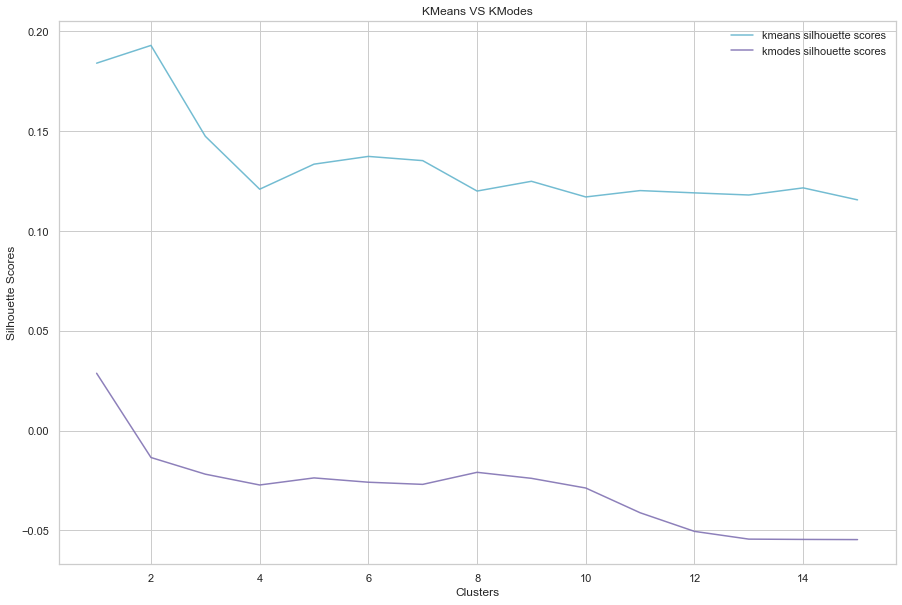

In [58]:
plt.figure(figsize = (15,10))
plt.title('KMeans VS KModes')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Scores')
plt.plot(range(1,len(kmeans_silhouette_scores) + 1), kmeans_silhouette_scores, label = 'kmeans silhouette scores', alpha = 0.9, color = 'c')
plt.plot(range(1,len(kmodes_silhouette_scores) + 1), kmodes_silhouette_scores, label = 'kmodes silhouette scores', alpha = 0.9, color = 'm')
plt.legend()
plt.show()

## winner kmeans

In [59]:
km = KMeans(n_clusters = 16, random_state = 37, n_jobs = -1)

In [60]:
km.fit(data)

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=16, n_jobs=-1, random_state=37)

In [61]:
y = km.predict(data)

In [62]:
data['Y'] = y

In [63]:
data['Y'].value_counts()

3     16742
2     16588
11    16042
0     15390
9     15016
5     12924
1     12571
15    12567
4     11441
10    11284
7      9198
12     8984
14     8419
6      4417
8      2572
13      234
Name: Y, dtype: int64

In [64]:
data4 = data.copy()

In [65]:
data

0         1         2         3         4         5         6  \
0       1.294358  0.347919 -0.434495 -0.948791 -0.270401 -0.588004 -0.058354   
1       0.378411  1.790898 -0.556689  0.125710 -0.270401 -0.510657 -0.058354   
2       1.299622  0.626289 -0.464860 -1.088146 -0.270401 -0.589511 -1.479502   
3      -1.313529  1.097814  1.275491  1.156204 -0.270401  1.804534 -0.911043   
4      -0.537536  0.950107 -0.455446  0.822485  3.698207 -0.588829  1.362794   
...          ...       ...       ...       ...       ...       ...       ...   
174384 -1.289849  1.450037 -0.574108  1.405576 -0.270401 -0.589385  0.225876   
174385  0.778480 -0.612173 -0.593617 -0.996465 -0.270401 -0.589564 -0.342584   
174386  0.807432  0.762634 -0.098811  0.389751 -0.270401  2.160212 -0.342584   
174387  1.107484 -0.424699  0.075406 -0.890115  3.698207 -0.589564 -1.479502   
174388 -0.684929  0.796720 -0.236531 -0.083323 -0.270401  2.073534  0.510105   

               7         8         9        10        11        12        13  \
0       0.930106 -0.154111 -1.536239 -0.626050 -0.066549  1.089753  0.413903   
1      -0.721489  0.788862 -1.536239 -0.854645 -0.287113 -0.995485  1.608718   
2       1.705763 -0.060991  0.650940 -0.991803  0.374580 -0.641450  0.621861   
3      -0.460536  0.780077  0.650940 -0.397454 -0.346918  0.363273 -1.823729   
4       1.057535  1.004092 -1.536239 -1.083241 -0.158725  0.167564 -0.852753   
...          ...       ...       ...       ...       ...       ...       ...   
174384 -0.183516  1.170478 -1.536239 -1.174679 -0.384776  0.296340 -1.280013   
174385 -0.083788  0.015086  0.650940 -1.174679 -0.382582 -0.736975 -1.121208   
174386 -0.543642 -0.112822 -1.536239 -1.174679 -0.425378 -0.295778  0.716387   
174387 -0.543642 -0.057301  0.650940  1.979941 -0.373254  1.795212 -0.773351   
174388  0.021479 -0.085413  0.650940 -1.174679 -0.438546 -0.158607  0.841162   

              14   Y  
0      -2.120635   4  
1      -2.120635   4  
2      -2.120635  11  
3      -2.120635  12  
4      -2.120635   7  
...          ...  ..  
174384  1.595750   2  
174385  1.632914   0  
174386  1.595750  12  
174387  1.632914   7  
174388  1.595750  12  

[174389 rows x 16 columns]

# Feature Selection

In [66]:
X = data.iloc[:,:15]
Y = data.iloc[:,15]

In [67]:
X.shape, Y.shape

((174389, 15), (174389,))

# Feature Methods -> Filter Methods -> correlation

<AxesSubplot:>

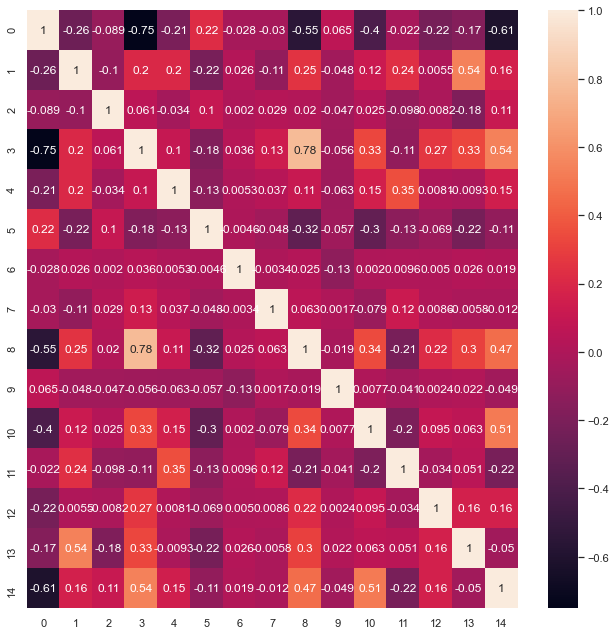

In [68]:
plt.figure(figsize=(11,11))
sns.heatmap(X.corr(), annot = True)

(174389, 13)

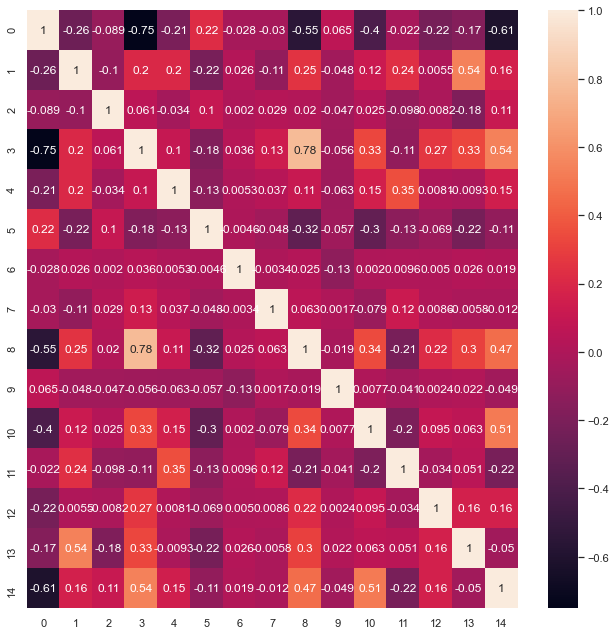

In [69]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = X.corr()

# optional: display a heatmap of the correlation matrix
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
X.drop(labels=corr_features, axis=1, inplace=True)

plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True)
X.shape

In [70]:
X.shape

(174389, 13)

In [71]:
# variance = [] 
# for i in range(1,X.shape[1]):
temp_pca = PCA()
temp_pca.fit(X)
var = np.cumsum(temp_pca.explained_variance_ratio_)

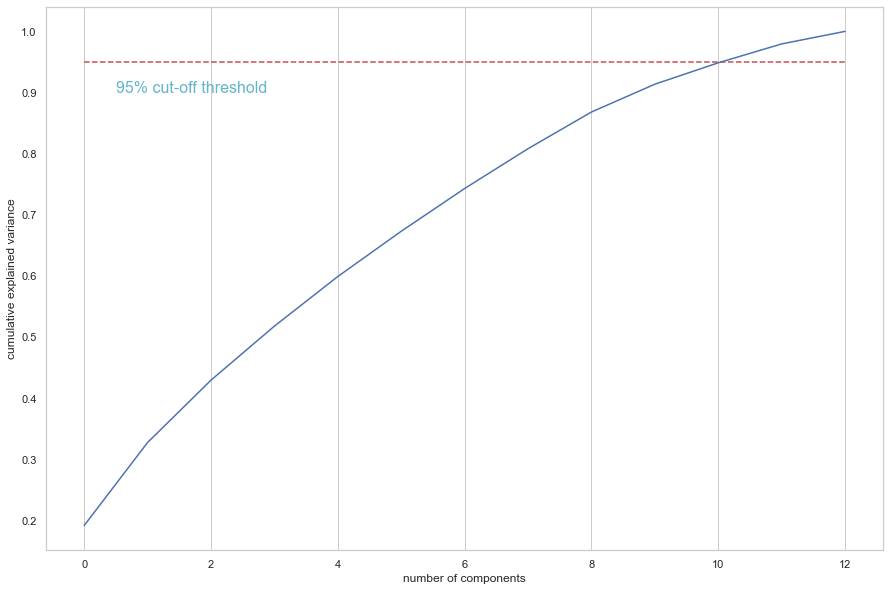

In [72]:
plt.figure(figsize = (15,10))
plt.plot([0.95]*len(var), '--', color = 'r')
plt.plot(var)
plt.grid(axis='x')
plt.text(0.5, 0.90, '95% cut-off threshold', color = 'c', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [73]:
pca = PCA(n_components = 10, random_state = 15)

In [74]:
pca.fit(X)

PCA(n_components=10, random_state=15)

In [75]:
X = pca.transform(X)

In [76]:
X.shape

(174389, 10)

In [77]:
data = pd.DataFrame(X)

In [78]:
data['Y'] = Y

In [79]:
data

0         1         2         3         4         5         6  \
0       1.233584 -1.593752 -0.310129  0.662062  1.473937 -0.150072 -0.268350   
1       0.462937 -2.532381 -1.230008  1.677016 -0.728447  0.244673  0.937833   
2       1.714603 -2.275735 -0.472728 -1.667321  0.642417  0.123572  1.221305   
3       1.172268  0.599658  0.313295 -0.099459 -0.346326  2.208619  0.174673   
4      -0.188171 -2.075072  2.762737  1.012271  0.304741 -0.702606 -0.868802   
...          ...       ...       ...       ...       ...       ...       ...   
174384 -1.278666  0.396663  0.563797  1.256769  0.039255  0.182518 -0.348091   
174385  0.720840  0.771778  0.078691 -0.893563 -0.611540 -0.650341 -0.163055   
174386  0.484020  0.233878 -0.243752  1.968409 -0.389249  1.642323 -0.033292   
174387 -2.005958  0.978605  1.266001 -2.120089 -1.073828  0.604641 -2.375308   
174388 -0.273065  0.290819 -0.569476  0.954366  0.266602  1.075175  0.236921   

               7         8         9   Y  
0      -1.087110  1.445667  0.919707   4  
1      -1.098500  0.794157  0.363756   4  
2      -0.879176  0.241832  0.539515  11  
3       0.862547 -0.314949 -0.433028  12  
4      -0.026166  0.181240  1.841067   7  
...          ...       ...       ...  ..  
174384 -1.005247 -0.178700 -1.795767   2  
174385 -0.213062 -0.435960 -0.998630   0  
174386 -1.261329 -1.426966  0.071803  12  
174387  0.289614  0.628159  2.844072   7  
174388  0.382578 -2.677518 -0.507657  12  

[174389 rows x 11 columns]

In [80]:
data5 = data.copy()

# Split

In [81]:
data6 = data.sample(20000)

In [82]:
X = data6.iloc[:,0:10]
Y = data6.iloc[:,10]

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 7, test_size = 0.2)

In [84]:
X_train.shape, Y_train.shape

((16000, 10), (16000,))

In [85]:
X_test.shape, Y_test.shape

((4000, 10), (4000,))

In [86]:
check_Y_test = Y_test

In [87]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

# Linear Regression

In [88]:
LR = LinearRegression()

In [89]:
LR.fit(X_train, Y_train)

LinearRegression()

In [90]:
y1_pred = LR.predict(X_test)
y1_pred

array([ 5.62326074,  4.91666151,  2.31047551, ...,  8.76113644,
       10.16321145,  6.53573077])

In [91]:
MMS = MinMaxScaler(feature_range=(0, 15))

In [92]:
y1_pred = MMS.fit_transform(y1_pred.reshape(-1, 1))
y1_pred

array([[5.2683193 ],
       [4.68037843],
       [2.51184612],
       ...,
       [7.87925531],
       [9.04588155],
       [6.02755934]])

In [93]:
y1_pred = y1_pred.reshape((1,-1))[0]
y1_pred

array([5.2683193 , 4.68037843, 2.51184612, ..., 7.87925531, 9.04588155,
       6.02755934])

In [94]:
y1_pred.shape

(4000,)

In [95]:
y1_pred = np.round(y1_pred, decimals = 0)

In [96]:
y1_pred

array([5., 5., 3., ..., 8., 9., 6.])

In [97]:
print("Classification report of Linear Regression:\n",classification_report(Y_test,y1_pred))

Classification report of Linear Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       366
           1       0.20      0.01      0.02       294
           2       0.69      0.17      0.27       386
           3       0.10      0.09      0.09       354
           4       0.10      0.20      0.13       279
           5       0.03      0.06      0.04       277
           6       0.02      0.13      0.03       100
           7       0.05      0.13      0.07       212
           8       0.03      0.19      0.05        74
           9       0.01      0.01      0.01       339
          10       0.28      0.16      0.20       269
          11       0.06      0.01      0.02       355
          12       0.00      0.00      0.00       211
          13       0.00      0.00      0.00         4
          14       1.00      0.01      0.02       204
          15       0.00      0.00      0.00       276

    accuracy                       

# Logistic Regression

In [98]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

In [99]:
hyper_c = [0.1,1,10,100]
scores = {'training' : [], 'testing' : []}
for c in hyper_c:
    temp_LogR = LogisticRegression(C = c, n_jobs = -1)
    temp_LogR.fit(X_train, Y_train)
    scores['training'].append(temp_LogR.score(X_train, Y_train))
    scores['testing'].append(temp_LogR.score(X_test, Y_test))
scores    

{'training': [0.8909375, 0.8961875, 0.896625, 0.8973125],
 'testing': [0.8895, 0.8935, 0.8945, 0.89525]}

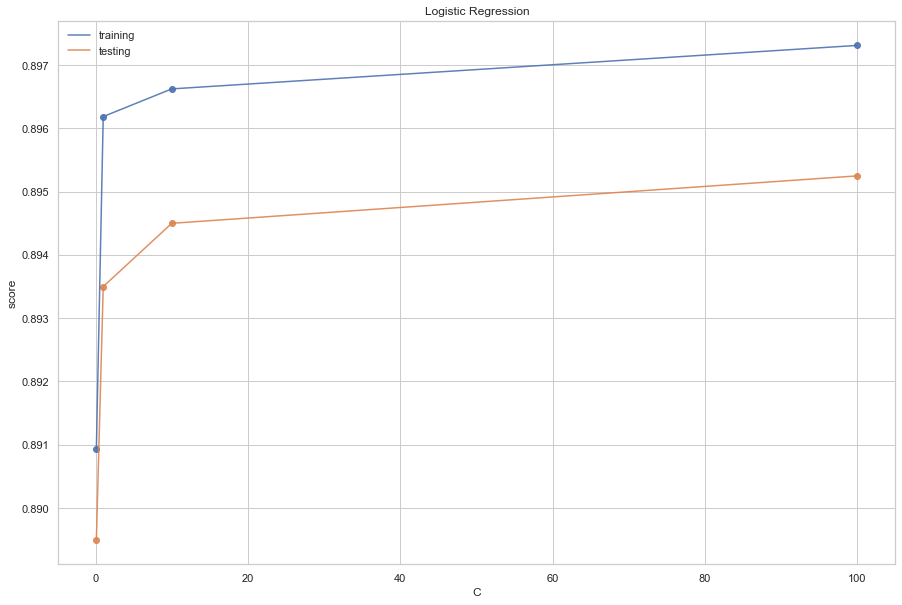

In [100]:
plt.figure(figsize = (15,10))
plt.title('Logistic Regression')
plt.xlabel('C')
plt.ylabel('score')
plt.scatter(hyper_c, scores['training'], alpha = 0.9)
plt.scatter(hyper_c, scores['testing'], alpha = 0.9)
plt.plot(hyper_c, scores['training'], label = 'training', alpha = 0.9)
plt.plot(hyper_c, scores['testing'], label = 'testing', alpha = 0.9)
plt.legend()
plt.show()

In [101]:
LogR = LogisticRegression(C = 10, n_jobs = -1)

In [102]:
LogR.fit(X_train, Y_train)

LogisticRegression(C=10, n_jobs=-1)

In [103]:
y2_pred = LogR.predict(X_test)

In [104]:
print("Classification report of Logistic Regression:\n",classification_report(Y_test,y2_pred))

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       366
           1       0.83      0.80      0.82       294
           2       0.92      0.94      0.93       386
           3       0.92      0.92      0.92       354
           4       0.91      0.91      0.91       279
           5       0.87      0.90      0.88       277
           6       0.98      0.98      0.98       100
           7       1.00      0.99      0.99       212
           8       0.97      1.00      0.99        74
           9       0.90      0.87      0.88       339
          10       0.91      0.91      0.91       269
          11       0.88      0.93      0.91       355
          12       0.90      0.90      0.90       211
          13       1.00      0.75      0.86         4
          14       0.93      0.91      0.92       204
          15       0.88      0.86      0.87       276

    accuracy                     

# SVM

In [105]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

In [106]:
gammas = [0.1, 1, 10, 100]
scores = {'training' : [], 'testing' : []}
for gamma in gammas:
    SVM_temp = SVC(gamma = gamma, random_state = 11)
    SVM_temp.fit(X_train, Y_train)
    scores['training'].append(temp_LogR.score(X_train, Y_train))
    scores['testing'].append(temp_LogR.score(X_test, Y_test))
scores

{'training': [0.8973125, 0.8973125, 0.8973125, 0.8973125],
 'testing': [0.89525, 0.89525, 0.89525, 0.89525]}

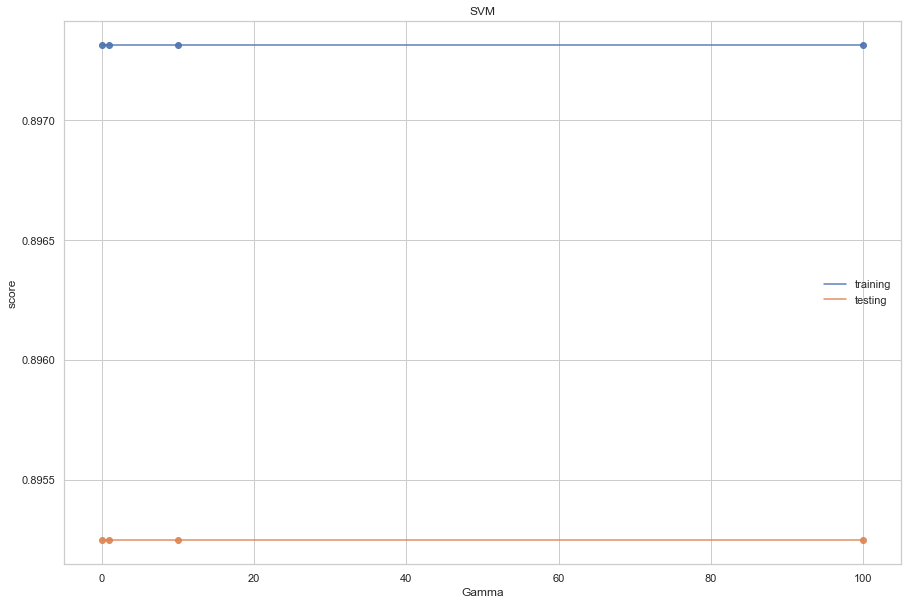

In [107]:
plt.figure(figsize = (15,10))
plt.title('SVM')
plt.xlabel('Gamma')
plt.ylabel('score')
plt.scatter(gammas, scores['training'], alpha = 0.9)
plt.scatter(gammas, scores['testing'], alpha = 0.9)
plt.plot(gammas, scores['training'], label = 'training', alpha = 0.9)
plt.plot(gammas, scores['testing'], label = 'testing', alpha = 0.9)
plt.legend()
plt.show()

In [108]:
SVM = SVC(gamma = 1, random_state = 12)

In [109]:
SVM.fit(X_train, Y_train)

SVC(gamma=1, random_state=12)

In [110]:
y3_pred = SVM.predict(X_test)

In [111]:
print("Classification report of SVM:\n",classification_report(Y_test,y3_pred))

Classification report of SVM:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       366
           1       0.81      0.80      0.80       294
           2       0.90      0.94      0.92       386
           3       0.92      0.90      0.91       354
           4       0.92      0.88      0.90       279
           5       0.82      0.91      0.86       277
           6       1.00      0.73      0.84       100
           7       0.99      0.95      0.97       212
           8       1.00      0.74      0.85        74
           9       0.89      0.87      0.88       339
          10       0.89      0.88      0.89       269
          11       0.88      0.90      0.89       355
          12       0.90      0.84      0.87       211
          13       0.00      0.00      0.00         4
          14       0.61      0.92      0.73       204
          15       0.89      0.79      0.83       276

    accuracy                           0.86      

C:\Users\ahbaz\miniconda3\envs\tensorflow_2\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision tree

In [112]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

In [113]:
X = data.iloc[:,0:10]
Y = data.iloc[:,10]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 9, test_size = 0.2)

In [114]:
Y_test.shape,check_Y_test.shape

((34878,), (4000,))

In [115]:
criterions = ["gini", "entropy"]
scores = {"gini" : [], "entropy" : []}
for criterion in criterions:
    score_train = []
    score_test = []
    for depth in range(1,11):
        DT_temp = DecisionTreeClassifier(criterion = criterion, random_state = 13, max_depth = depth)
        DT_temp.fit(X_train, Y_train)
        score_train.append(DT_temp.score(X_train, Y_train))
        score_test.append(DT_temp.score(X_test,Y_test))
    scores[criterion].append([score_train,score_test])

In [116]:
plt.style.use('seaborn-darkgrid')

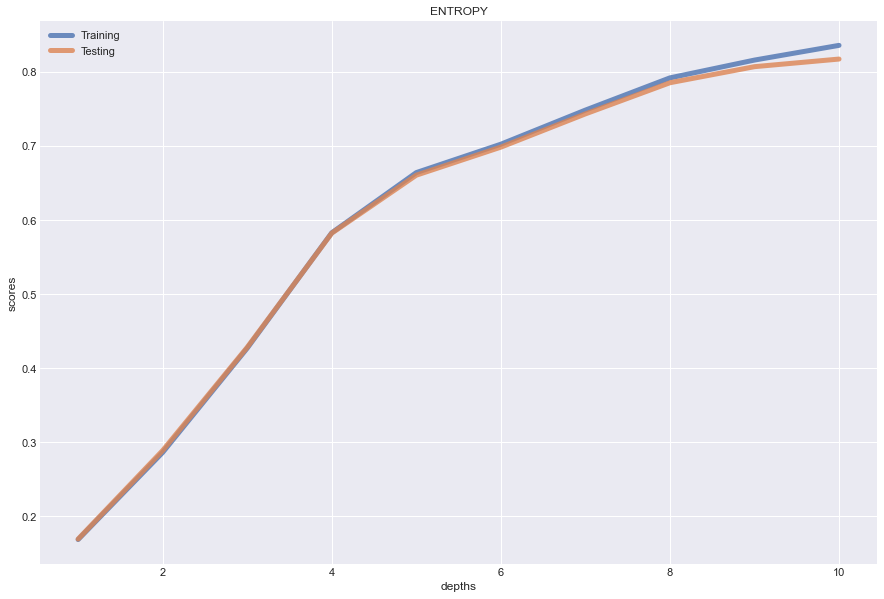

In [117]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("ENTROPY")
plt.plot(range(1,11), scores['entropy'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['entropy'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

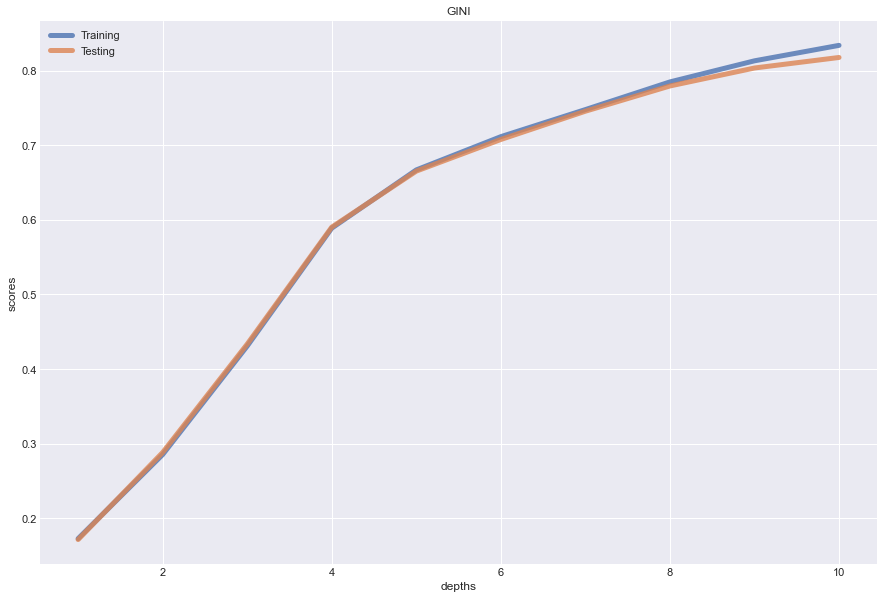

In [118]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("GINI")
plt.plot(range(1,11), scores['gini'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['gini'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

In [119]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 29)

In [120]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=29)

In [121]:
y4_pred = DT.predict(X_test)

In [122]:
print("Train Score :",DT.score(X_train, Y_train))
print("Test Score :",DT.score(X_test, Y_test))

Train Score : 0.8355255141171664
Test Score : 0.8171053386088651


In [123]:
print("Classification report of DT:\n",classification_report(Y_test, y4_pred))

Classification report of DT:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68      3147
           1       0.71      0.71      0.71      2477
           2       0.86      0.90      0.88      3290
           3       0.84      0.79      0.81      3331
           4       0.83      0.82      0.83      2195
           5       0.87      0.83      0.85      2619
           6       0.97      0.93      0.95       903
           7       1.00      0.98      0.99      1925
           8       0.99      0.99      0.99       496
           9       0.76      0.83      0.79      3036
          10       0.80      0.86      0.83      2253
          11       0.79      0.86      0.82      3207
          12       0.81      0.80      0.81      1781
          13       0.88      0.96      0.92        46
          14       0.81      0.77      0.79      1658
          15       0.85      0.73      0.79      2514

    accuracy                           0.82     34

In [124]:
plt.style.use('dark_background')

[Text(4079.5089821257197, 5188.909090909091, 'X[0] <= 0.209\nentropy = 3.809\nsamples = 139511\nvalue = [12243, 10094, 13298, 13411, 9246, 10305, 3514, 7273\n2076, 11980, 9031, 12835, 7203, 188, 6761, 10053]\nclass = y[3]'),
 Text(2273.0668186180424, 4694.727272727273, 'X[2] <= 0.832\nentropy = 3.281\nsamples = 80132\nvalue = [7531, 9504, 13213, 13292, 2264, 32, 527, 7257, 1978\n11746, 236, 2740, 5645, 42, 4119, 6]\nclass = y[3]'),
 Text(1319.4430782149711, 4200.545454545454, 'X[3] <= -0.117\nentropy = 2.942\nsamples = 64922\nvalue = [7358, 8968, 12087, 13269, 2186, 16, 39, 129, 0\n11732, 236, 2740, 4037, 0, 2122, 3]\nclass = y[3]'),
 Text(646.7940259117082, 3706.363636363636, 'X[4] <= 0.695\nentropy = 2.441\nsamples = 30188\nvalue = [5392, 6436, 175, 2540, 46, 2, 33, 101, 0, 11391\n19, 1439, 690, 0, 1922, 2]\nclass = y[9]'),
 Text(308.58685220729365, 3212.181818181818, 'X[1] <= 0.435\nentropy = 2.177\nsamples = 22839\nvalue = [5217, 3113, 130, 2059, 31, 2, 22, 100, 0, 10474\n16, 1081,

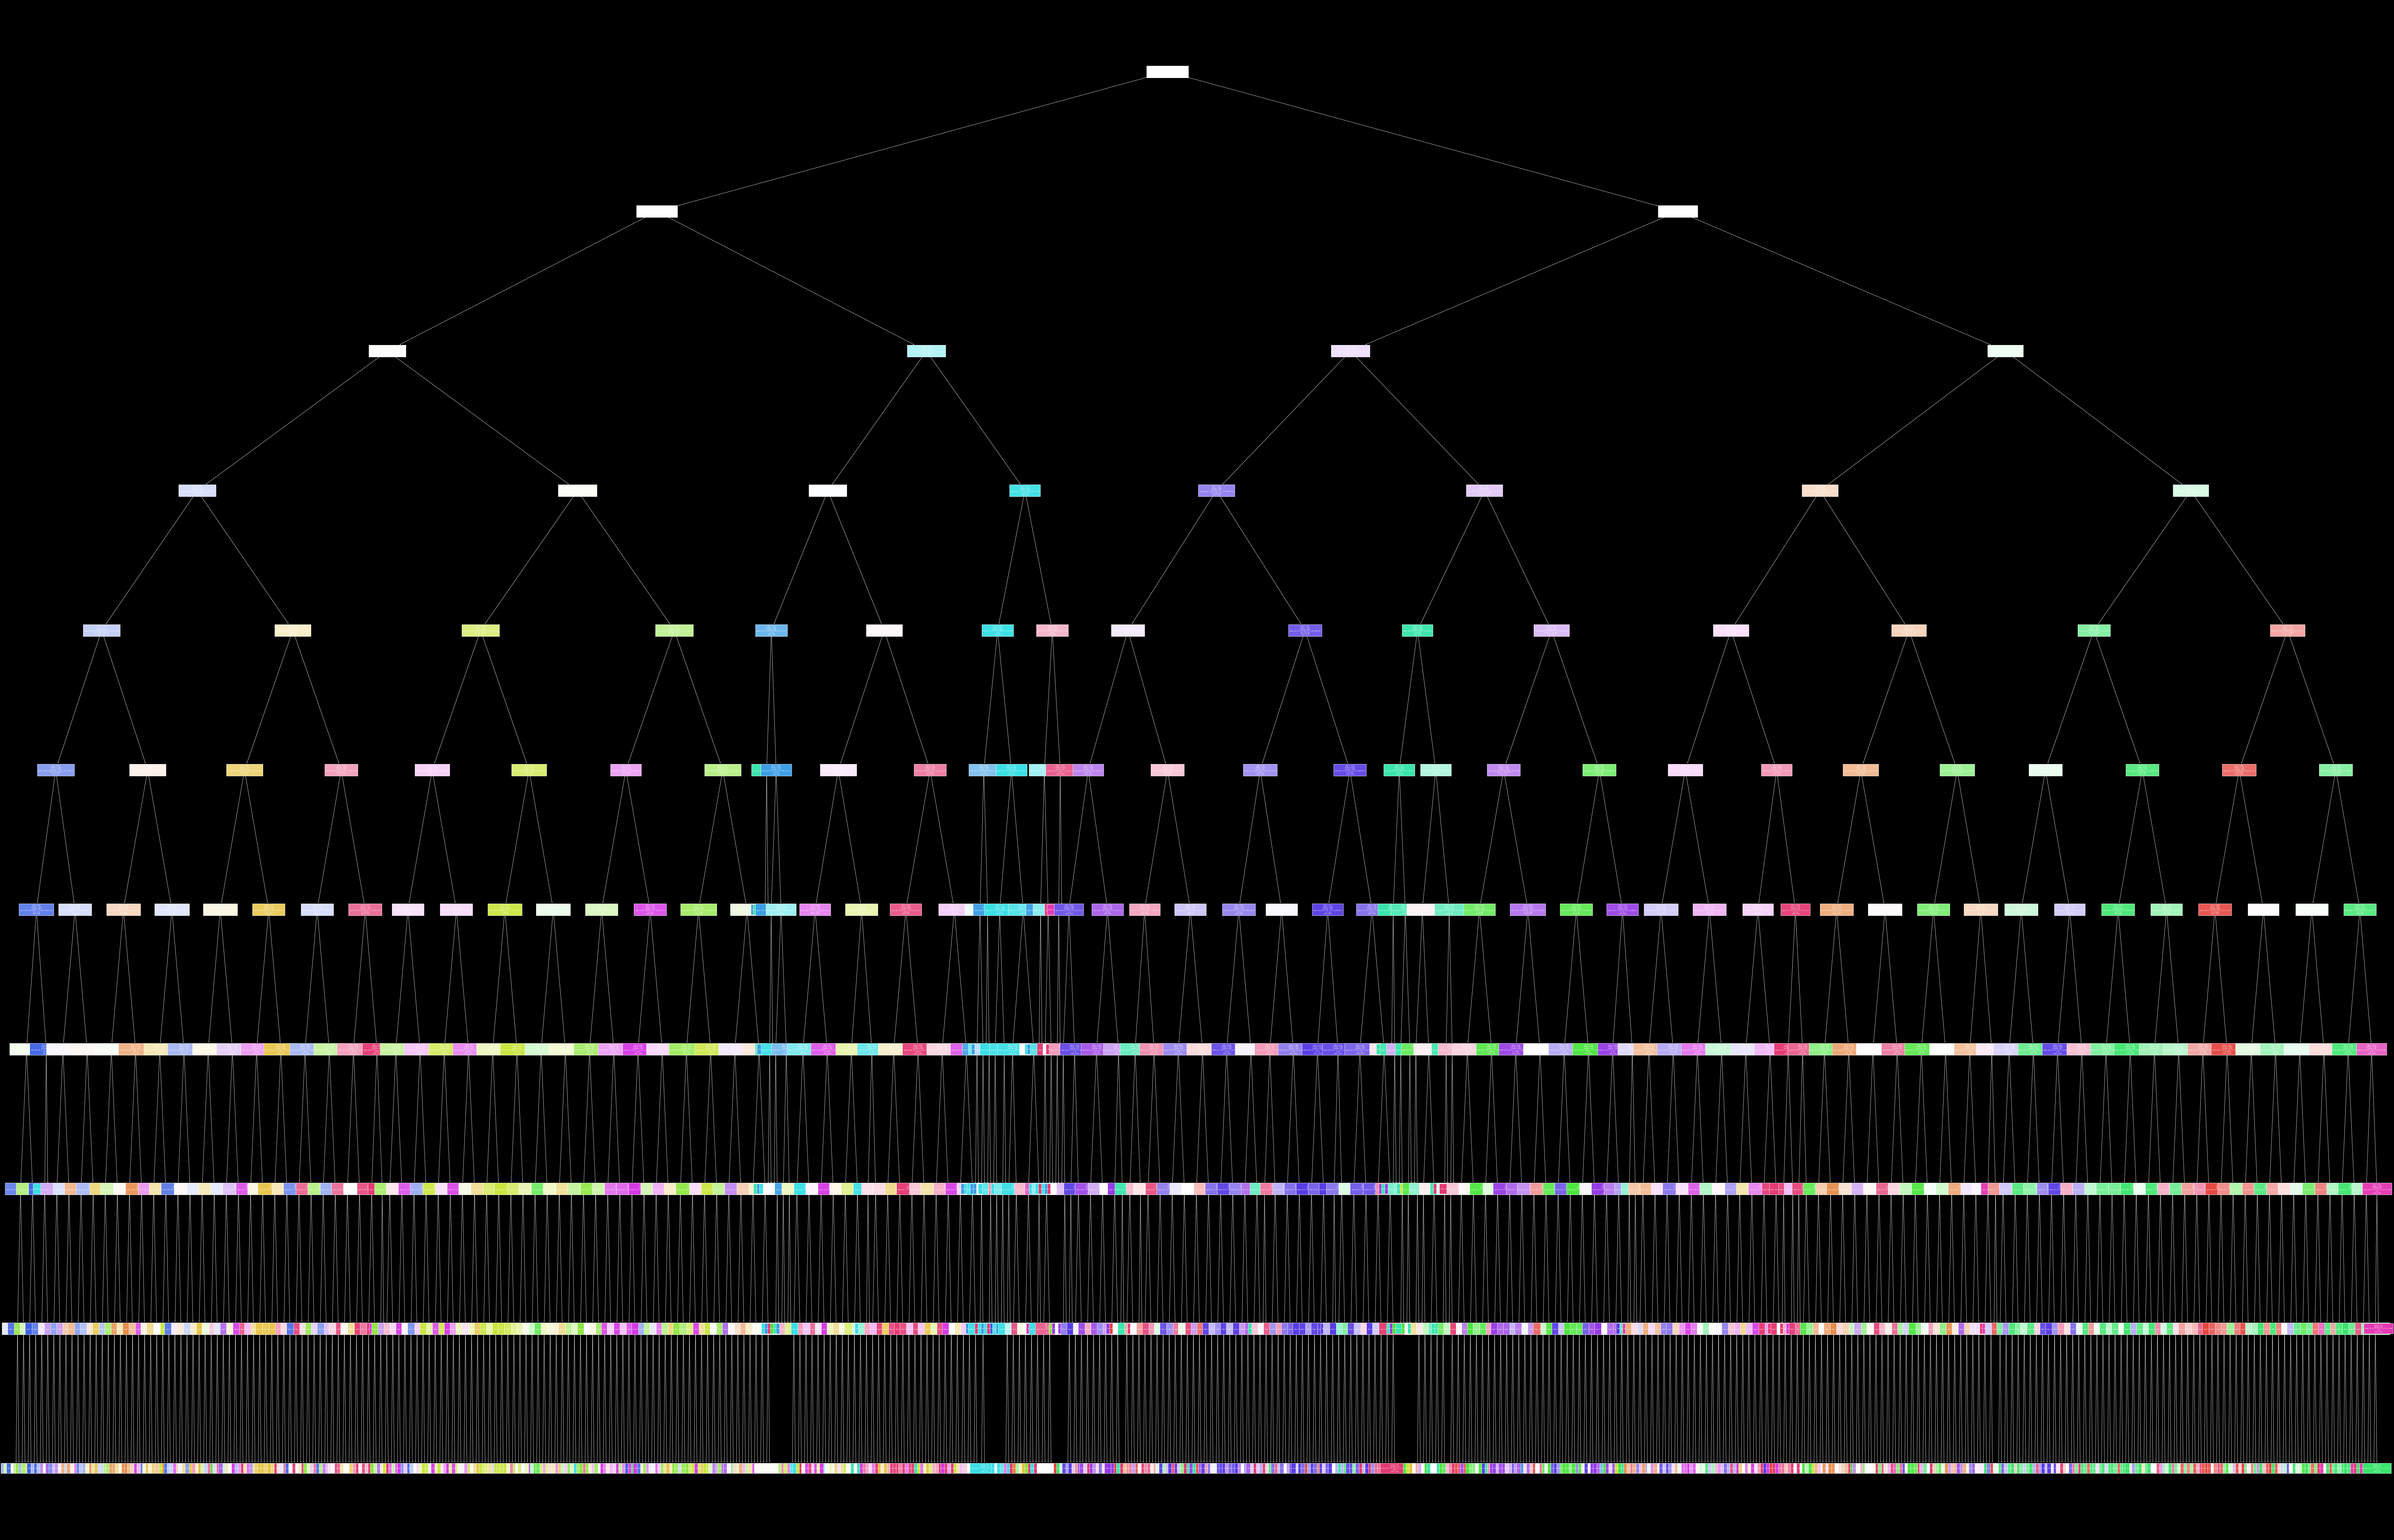

In [125]:
plt.figure(figsize = (150,100))
plt.style.use('dark_background')
plot_tree(DT,class_names=True, filled = True, fontsize = 5)

# RF

In [126]:
Y_test.shape,check_Y_test.shape

((34878,), (4000,))

In [127]:
criterions = ["gini", "entropy"]
scores = {"gini" : [], "entropy" : []}
for criterion in criterions:
    score_train = []
    score_test = []
    for depth in range(1,11):
        RF_temp = RandomForestClassifier(criterion = criterion, random_state = 17, max_depth = depth, n_jobs = -1)
        RF_temp.fit(X_train, Y_train)
        score_train.append(RF_temp.score(X_train, Y_train))
        score_test.append(RF_temp.score(X_test,Y_test))
    scores[criterion].append([score_train,score_test])

In [128]:
plt.style.use('seaborn-darkgrid')

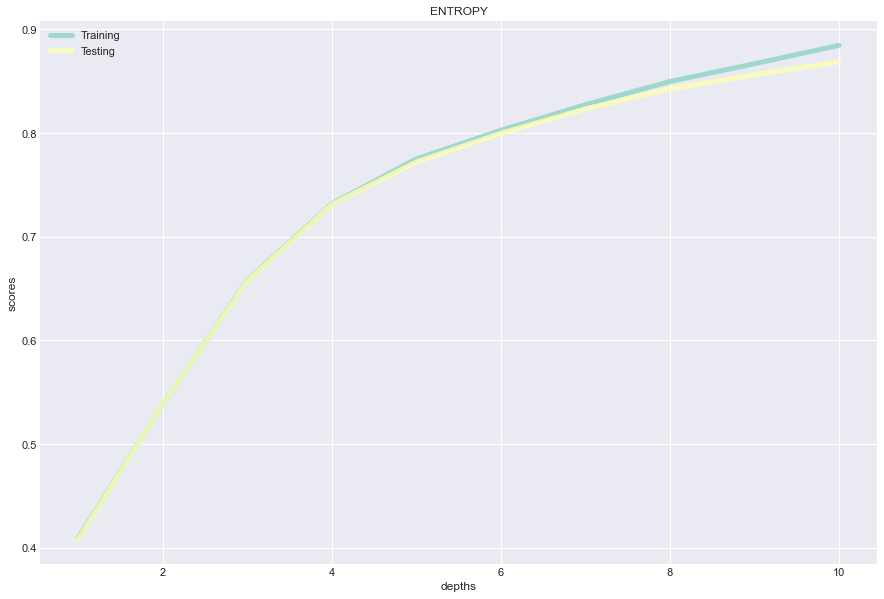

In [129]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("ENTROPY")
plt.plot(range(1,11), scores['entropy'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['entropy'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

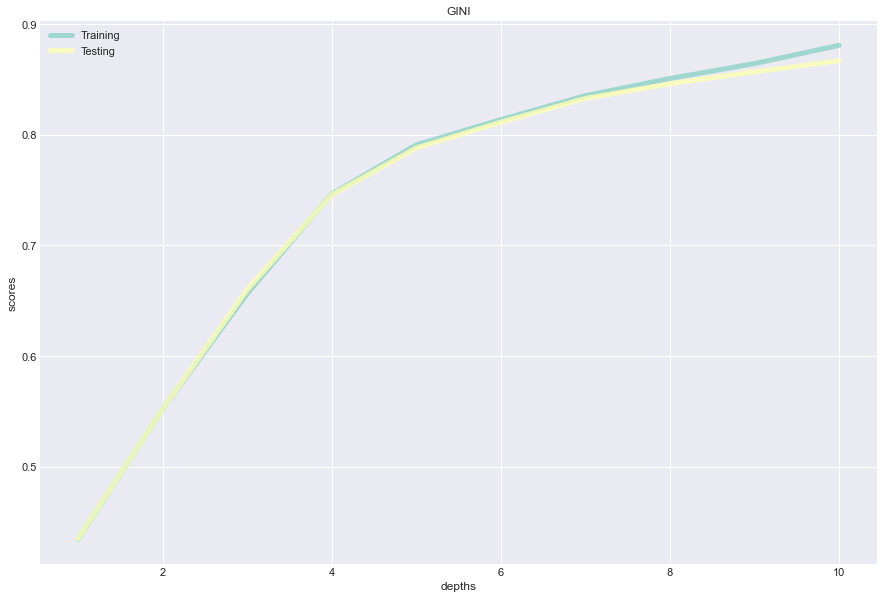

In [130]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("GINI")
plt.plot(range(1,11), scores['gini'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['gini'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

In [131]:
RF = RandomForestClassifier(criterion = 'entropy', random_state = 40, max_depth = 10, n_jobs = -1)

In [132]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=40)

In [133]:
y5_pred = RF.predict(X_test)

In [134]:
print("Classification report of RF:\n",classification_report(Y_test, y5_pred))

Classification report of RF:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      3147
           1       0.85      0.76      0.80      2477
           2       0.87      0.95      0.91      3290
           3       0.85      0.91      0.88      3331
           4       0.87      0.87      0.87      2195
           5       0.86      0.88      0.87      2619
           6       0.98      0.96      0.97       903
           7       1.00      1.00      1.00      1925
           8       1.00      1.00      1.00       496
           9       0.85      0.89      0.87      3036
          10       0.86      0.88      0.87      2253
          11       0.86      0.87      0.86      3207
          12       0.87      0.88      0.88      1781
          13       1.00      1.00      1.00        46
          14       0.92      0.90      0.91      1658
          15       0.88      0.81      0.84      2514

    accuracy                           0.87     34

In [135]:
plt.style.use('dark_background')

[Text(4473.540230573577, 4151.127272727273, '2 <= 0.128\nentropy = 3.807\nsamples = 88295\nvalue = [12242, 10025, 13402, 13526, 9394, 10379, 3506, 7310\n2037, 11942, 8853, 12788, 7207, 196, 6576, 10128]'),
 Text(2441.185721394869, 3755.7818181818184, '0 <= -0.064\nentropy = 3.353\nsamples = 55198\nvalue = [9682, 7218, 8247, 13007, 5575, 2211, 48, 1, 0, 11665\n7852, 12609, 2273, 0, 1062, 5747]'),
 Text(1234.689158802713, 3360.4363636363637, '8 <= 0.162\nentropy = 2.701\nsamples = 30464\nvalue = [4545, 6515, 8143, 12620, 1080, 1, 9, 1, 0, 11063\n73, 1578, 1717, 0, 651, 4]'),
 Text(614.6063108227662, 2965.090909090909, '3 <= -0.214\nentropy = 2.401\nsamples = 17689\nvalue = [2031, 2144, 1461, 11323, 55, 1, 6, 1, 0, 7425, 73\n937, 1713, 0, 618, 4]'),
 Text(315.94219994102036, 2569.745454545455, '2 <= -0.934\nentropy = 1.977\nsamples = 7740\nvalue = [1153, 1341, 2, 1492, 0, 1, 6, 1, 0, 6965, 1, 340\n224, 0, 575, 0]'),
 Text(157.97109997051018, 2174.4, '5 <= 0.09\nentropy = 1.073\nsamples = 

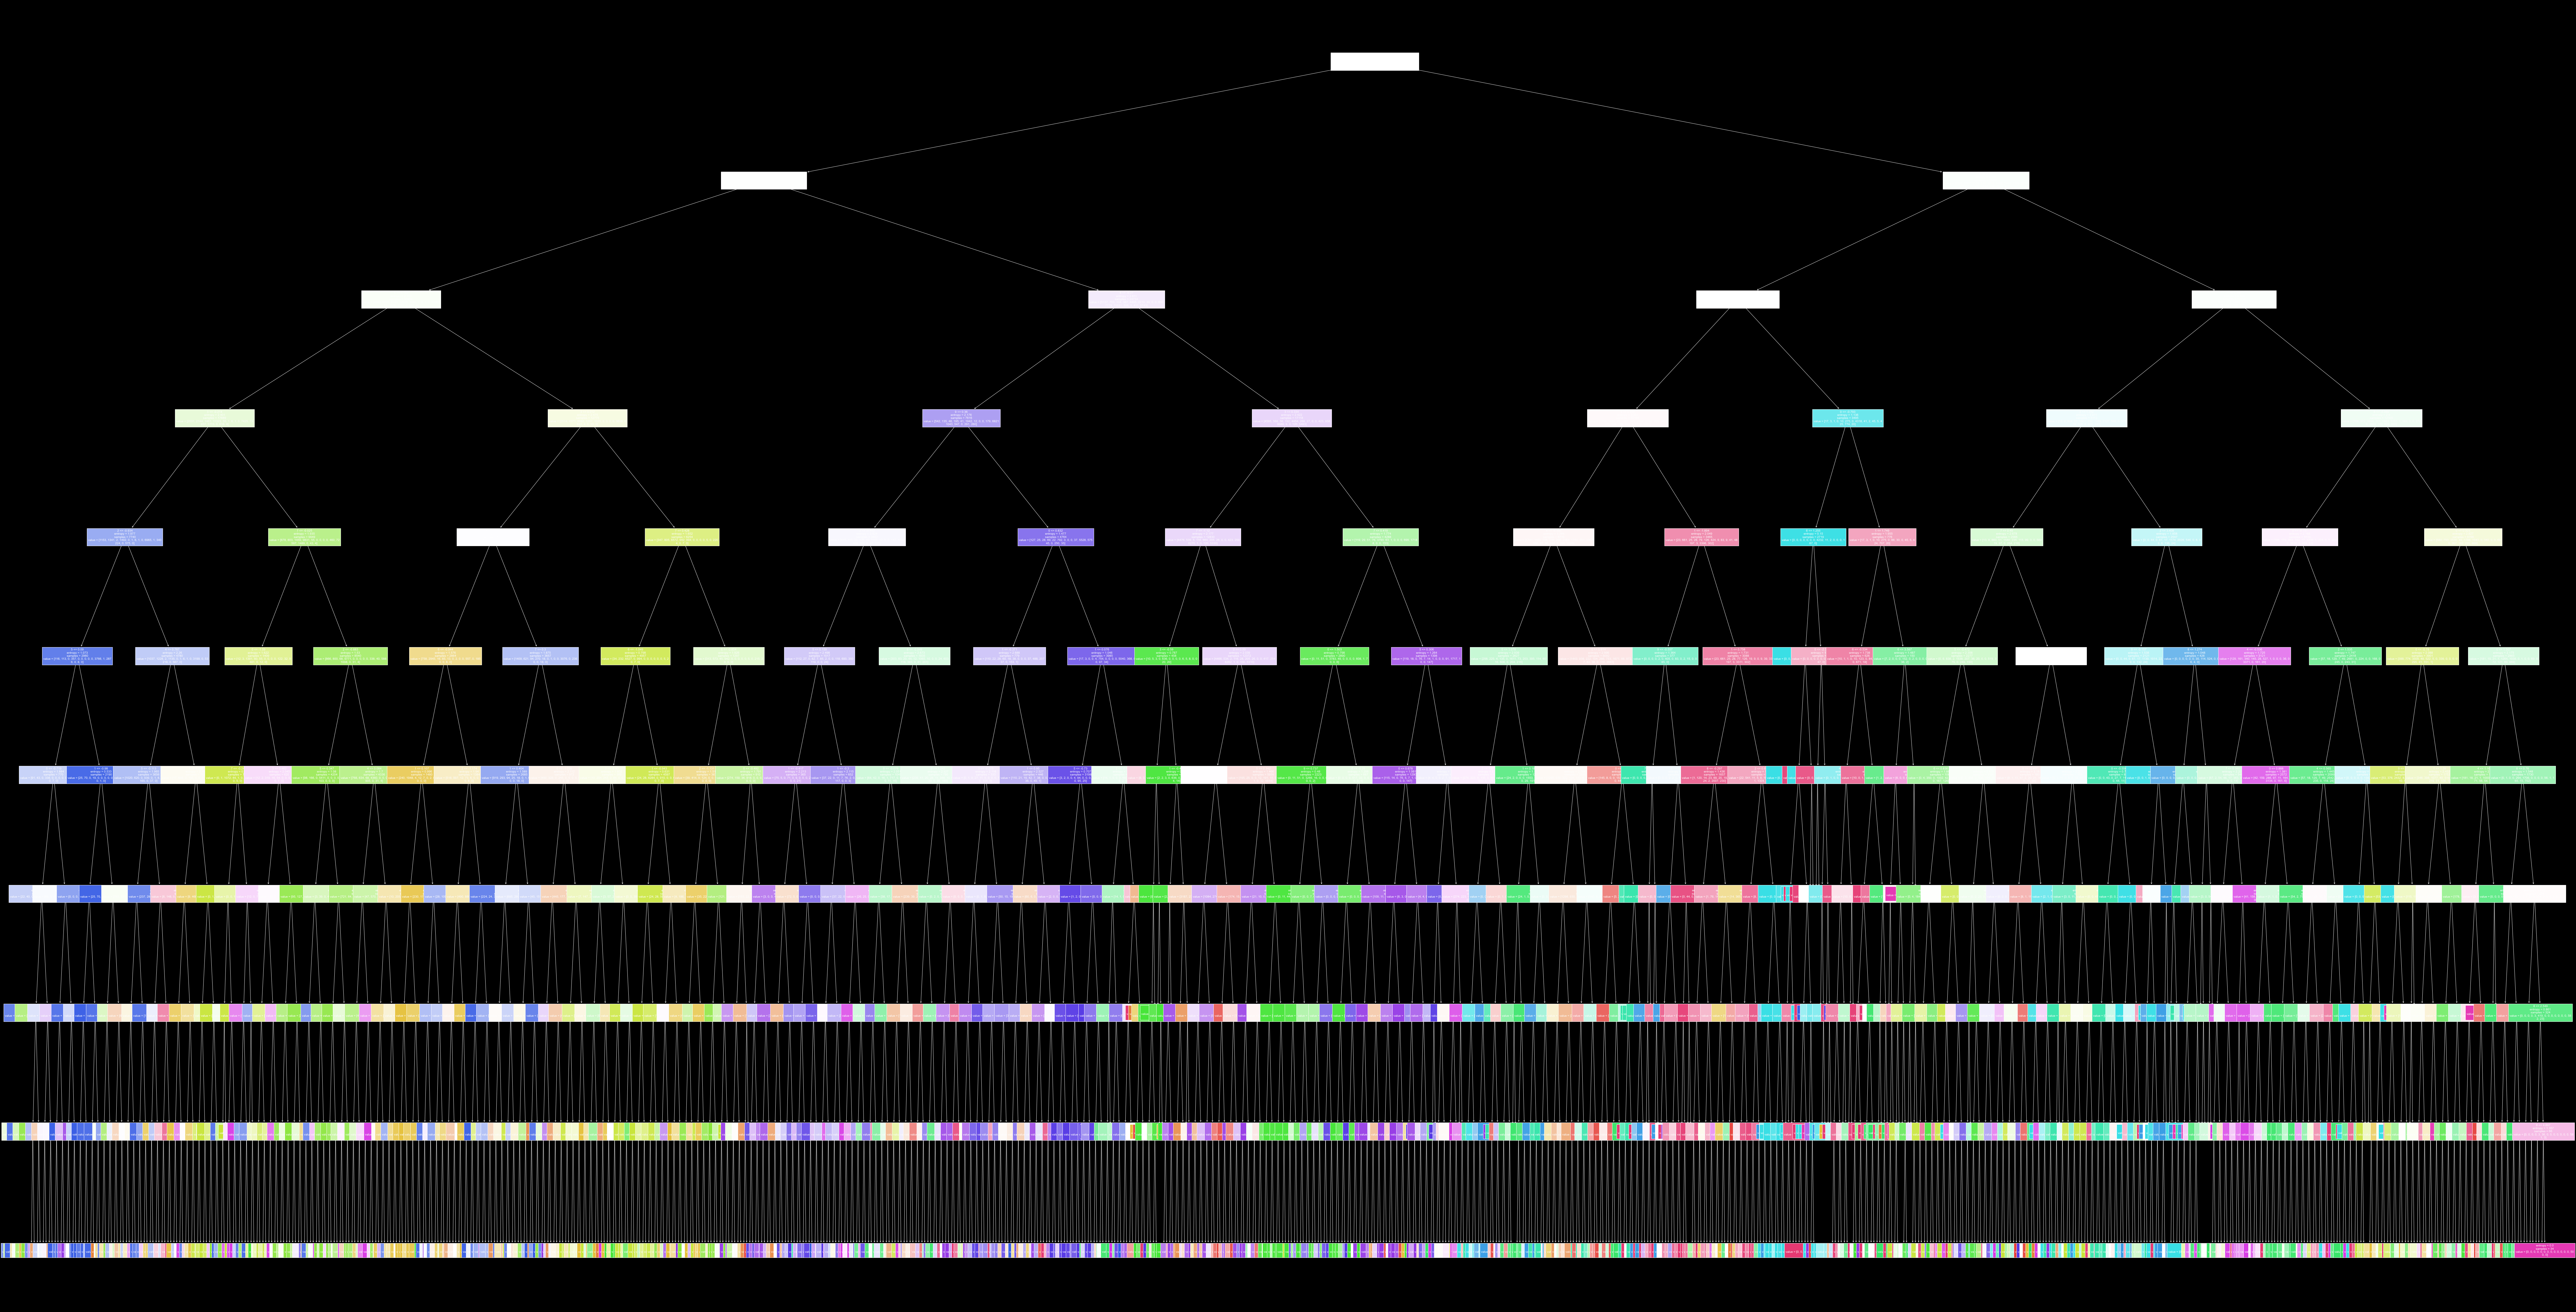

In [151]:
#estimators_[0] is by default the best tree in randomForestClassifier
plt.style.use('dark_background')
plt.subplots(figsize=(150,80))
plot_tree(RF.estimators_[0], feature_names=X_train.columns, filled=True, fontsize = 10)

In [136]:
check_Y_test.shape,Y_test.shape

((4000,), (34878,))

In [156]:
print("Classification report of Linear Regression:\n",classification_report(check_Y_test,y1_pred))
print('-' * 60)
print()
print("Classification report of Logistic Regression:\n",classification_report(check_Y_test,y2_pred))
print('-' * 60)
print()
print("Classification report of SVM:\n",classification_report(check_Y_test,y3_pred))
print('-' * 60)
print()
print("Classification report of DT:\n",classification_report(Y_test, y4_pred))
print('-' * 60)
print()
print("Classification report of RF:\n",classification_report(Y_test, y5_pred))

Classification report of Linear Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       366
           1       0.20      0.01      0.02       294
           2       0.69      0.17      0.27       386
           3       0.10      0.09      0.09       354
           4       0.10      0.20      0.13       279
           5       0.03      0.06      0.04       277
           6       0.02      0.13      0.03       100
           7       0.05      0.13      0.07       212
           8       0.03      0.19      0.05        74
           9       0.01      0.01      0.01       339
          10       0.28      0.16      0.20       269
          11       0.06      0.01      0.02       355
          12       0.00      0.00      0.00       211
          13       0.00      0.00      0.00         4
          14       1.00      0.01      0.02       204
          15       0.00      0.00      0.00       276

    accuracy                       

In [145]:
plt.style.use('dark_background')

<AxesSubplot:>

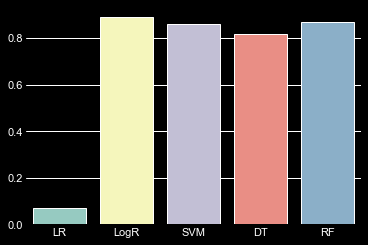

In [146]:
sns.barplot(x=['LR','LogR','SVM','DT','RF'], y = [0.07,0.89,0.86,0.82,0.87])

In [147]:
data1

acousticness                             artists  danceability  \
0           0.991000                     ['Mamie Smith']         0.598   
1           0.643000           ["Screamin' Jay Hawkins"]         0.852   
2           0.993000                     ['Mamie Smith']         0.647   
3           0.000173                 ['Oscar Velazquez']         0.730   
4           0.295000                            ['Mixe']         0.704   
...              ...                                 ...           ...   
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385      0.795000                    ['Alessia Cara']         0.429   
174386      0.806000                       ['Roger Fly']         0.671   
174387      0.920000                    ['Taylor Swift']         0.462   
174388      0.239000                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
0            168333   0.224         0  0cS0A1fUEUd1EW3FcF8AEI   
1            150200   0.517         0  0hbkKFIJm7Z05H8Zl9w30f   
2            163827   0.186         0  11m7laMUgmOKqI3oYzuhne   
3            422087   0.798         0  19Lc5SfJJ5O1oaxY0fpwfh   
4            165224   0.707         1  2hJjbsLCytGsnAHfdsLejp   
...             ...     ...       ...                     ...   
174384       147615   0.866         0  46LhBf6TvYjZU2SMvGZAbn   
174385       144720   0.211         0  7tue2Wemjd0FZzRtDrQFZd   
174386       218147   0.589         0  48Qj61hOdYmUCFJbpQ29Ob   
174387       244000   0.240         1  1gcyHQpBQ1lfXGdhZmWrHP   
174388       197710   0.460         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  \
0               0.000522    5    0.3790   -12.628     0   
1               0.026400    5    0.0809    -7.261     0   
2               0.000018    0    0.5190   -12.098     1   
3               0.801000    2    0.1280    -7.311     1   
4               0.000246   10    0.4020    -6.036     0   
...                  ...  ...       ...       ...   ...   
174384          0.000060    6    0.1780    -5.089     0   
174385          0.000000    4    0.1960   -11.665     1   
174386          0.920000    4    0.1130   -12.393     0   
174387          0.000000    0    0.1130   -12.077     1   
174388          0.891000    7    0.2150   -12.237     1   

                                                     name  popularity  \
0                                Keep A Song In Your Soul          12   
1                                    I Put A Spell On You           7   
2                                            Golfing Papa           4   
3       True House Music - Xavier Santos & Carlos Gomi...          17   
4                                               Xuniverxe           2   
...                                                   ...         ...   
174384                                            The One           0   
174385                                      A Little More           0   
174386                                           Together           0   
174387                                 champagne problems          69   
174388                                     Improvisations           0   

       release_date  speechiness    tempo  valence  year  
0              1920       0.0936  149.976   0.6340  1920  
1        1920-01-05       0.0534   86.889   0.9500  1920  
2              1920       0.1740   97.600   0.6890  1920  
3        1920-01-01       0.0425  127.997   0.0422  1920  
4        1920-10-01       0.0768  122.076   0.2990  1920  
...             ...          ...      ...      ...   ...  
174384   2020-12-25       0.0356  125.972   0.1860  2020  
174385   2021-01-22       0.0360   94.710   0.2280  2021  
174386   2020-12-09       0.0282  108.058   0.7140  2020  
174387   2021-01-07       0.0377  171.319   0.3200  2021  
174388   2020-12-09       0.0258  112.208   0.7470  2020  

[174389 rows x 19 columns]

In [148]:
def recommendation(spotify_link, suggestion_length, data1, data5):
    spotify_id = spotify_link.split(':')[2]
    # print(spotify_id)
    spotify_index = data1[data1.id == spotify_id].index[0]
    # print(spotify_index)
    spotify_cluster_num = data5.iloc[spotify_index].Y
    spotify_recommendation_index_list = data5[data5.Y == spotify_cluster_num].sample(suggestion_length).index.to_list()
    return data1.iloc[spotify_recommendation_index_list]

In [149]:
# spotify:track:7tue2Wemjd0FZzRtDrQFZd
spotify_link = input("Enter Which song were you listening : ")

Enter Which song were you listening : spotify:track:7tue2Wemjd0FZzRtDrQFZd


In [150]:
recommendation(spotify_link,int(input("Enter the number of recommendations")), data1, data5)

Enter the number of recommendations10


acousticness                        artists  danceability  \
12138          0.424  ['Rick James', 'Teena Marie']         0.335   
8165           0.589                 ['Jimmy Dean']         0.560   
91393          0.543     ['Gerry & The Pacemakers']         0.498   
29998          0.850               ['Charlie Rich']         0.472   
132301         0.877               ['Chris Montez']         0.578   
8243           0.788              ['Frank Sinatra']         0.463   
83493          0.336                      ['Cream']         0.324   
74180          0.543               ['Rise Against']         0.645   
16735          0.810                ['Dean Martin']         0.499   
158215         0.883               ['XXXTENTACION']         0.610   

        duration_ms  energy  explicit                      id  \
12138        437933   0.455         0  6XJdmdiLRvvQXRLMenQmjx   
8165         158707   0.522         0  6G4eZPVqKgMOe5r1ZiwVrb   
91393        169227   0.576         0  6bVSswCfXa6JEBedOgLwr3   
29998        174827   0.338         0  4NRFiS0pHjTFDjOm1LWTZj   
132301       144613   0.249         0  7deQkeKqeco5qrNIDyXFjS   
8243         223160   0.096         0  2Ms3uySGjsAUk2wKaDh5V2   
83493        193467   0.378         0  20JyPoNRMR68kKp9IQUlZ6   
74180        253080   0.417         0  00hVU6kDP67JHurfwG2dtq   
16735        143027   0.304         0  4uQqahi1iUP35xE2qGdKdo   
158215       109986   0.258         0  2oe6dDthgthqUkfL3czpEd   

        instrumentalness  key  liveness  loudness  mode  \
12138           0.000004    1    0.1090   -10.051     1   
8165            0.000000    7    0.1340   -11.518     1   
91393           0.000000    7    0.0895   -11.083     1   
29998           0.000221    2    0.0761   -11.196     1   
132301          0.000239    0    0.1760   -13.609     1   
8243            0.000000    2    0.2040   -17.147     1   
83493           0.683000    7    0.2000   -16.164     1   
74180           0.000000    4    0.0982    -7.022     1   
16735           0.000000    0    0.0546   -11.541     1   
158215          0.014500    0    0.1030   -12.758     1   

                                                     name  popularity  \
12138                                     Fire And Desire          53   
8165                                      The Cajun Queen          33   
91393   Big Bright Green Pleasure Machine - 2008 Remaster           5   
29998                                 Behind Closed Doors          45   
132301                           The Shadow Of Your Smile          29   
8243                             Polka Dots And Moonbeams          33   
83493                             Pressed Rat And Warthog          31   
74180                                         Hero Of War          64   
16735                Baby, It's Cold Outside - Remastered          68   
158215                                      ALONE, PART 3          67   

       release_date  speechiness    tempo  valence  year  
12138    1981-04-07       0.0371   82.046    0.200  1981  
8165           1961       0.1840   69.276    0.515  1961  
91393    2008-02-11       0.0485   92.020    0.448  2008  
29998          1973       0.0273   85.660    0.522  1973  
132301   1966-01-01       0.0289   96.083    0.444  1966  
8243        1961-10       0.0401  130.070    0.326  1961  
83493    1968-07-01       0.0399  130.879    0.424  1968  
74180    2008-01-01       0.0290   77.054    0.256  2008  
16735    2004-01-01       0.0633  129.301    0.521  2004  
158215   2018-03-16       0.0331  127.080    0.164  2018